# Linear Regression

## BoomBikes Assignment

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The requirement is to model the demand for shared bikes with the available independent variables.

#### Data Dictionary
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Import the required libraries

In [133]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # Splitting dataset Into Train And Test.
from sklearn.linear_model import LinearRegression   # LinearRegression Mode
from sklearn.preprocessing import MinMaxScaler    # Scaling.
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.metrics import r2_score # R² Score
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF
import statsmodels.api as sm  # Statsmodels

#### Loading the dataframe

In [134]:
df = pd.read_csv("day.csv")

In [135]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Data inspection

In [136]:
df.shape

(730, 16)

In [137]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data cleaning

In [139]:
# Check if NaN values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [140]:
# Check if duplicates
df.duplicated().sum()

0

#### Standardising the data

In [141]:
# Renaming columns
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'temp': 'temperature', 'cnt': 'count'}, inplace=True)

# Dropping unwanted columns
df.drop(['instant', 'date', 'casual', 'registered'], axis=1, inplace=True)

# Mapping 'season' column
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Mapping 'month' column
df['month'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Mapping 'weekday' column
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Mapping 'weathersit' column
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

# Displaying the modified dataset
df.head()

season  year month  holiday weekday  workingday weathersit  temperature  \
0  spring     0   Jan        0     Sat           0      Misty    14.110847   
1  spring     0   Jan        0     Sun           0      Misty    14.902598   
2  spring     0   Jan        0     Mon           1      Clear     8.050924   
3  spring     0   Jan        0     Tue           1      Clear     8.200000   
4  spring     0   Jan        0     Wed           1      Clear     9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

#### Data Visualisation

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [143]:
# Filtering numerical columns
numerical_values_col=(df.dtypes == 'int64') | (df.dtypes == int) | (df.dtypes == float) | (df.dtypes == 'float64')
numerical_col = numerical_values_col[numerical_values_col].index
print(f'Numerical Values Are {numerical_values_col[numerical_values_col].count()}')
list(numerical_col)

Numerical Values Are 8


['year',
 'holiday',
 'workingday',
 'temperature',
 'atemp',
 'humidity',
 'windspeed',
 'count']

In [144]:
# Filtering categorical columns
object_values_col=(df.dtypes == 'object') | (df.dtypes =='category')
print(f'Categorical Values Are {object_values_col[object_values_col].count()}')
categorical_col = object_values_col[object_values_col].index
list(categorical_col)

Categorical Values Are 4


['season', 'month', 'weekday', 'weathersit']

#### Univariate analysis on numerical columns

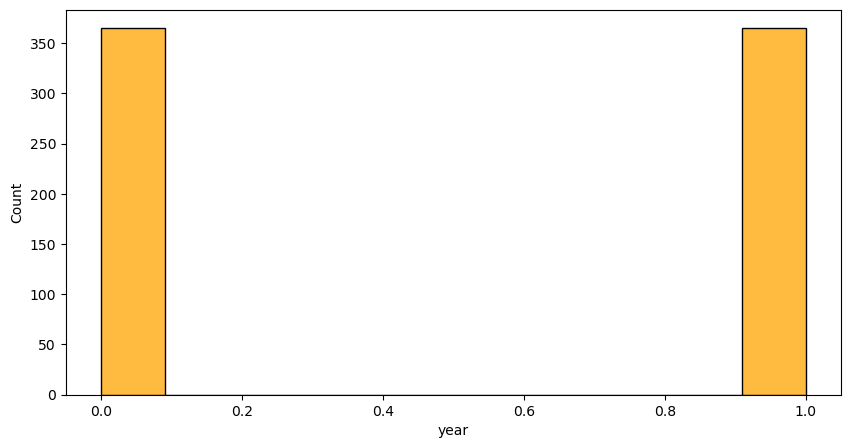

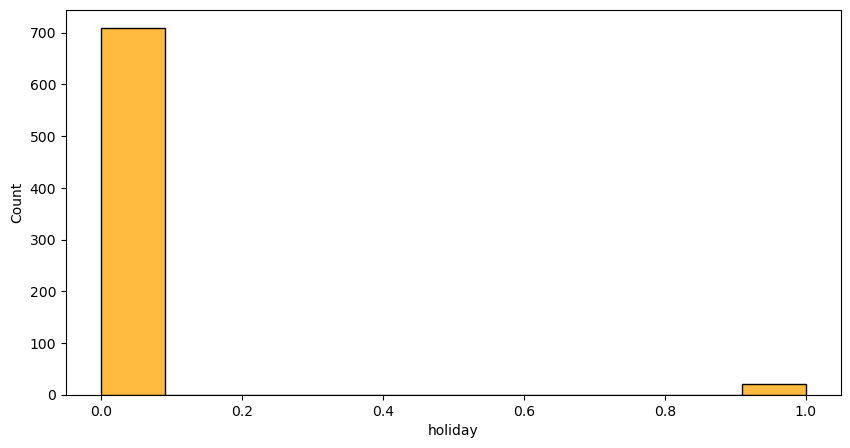

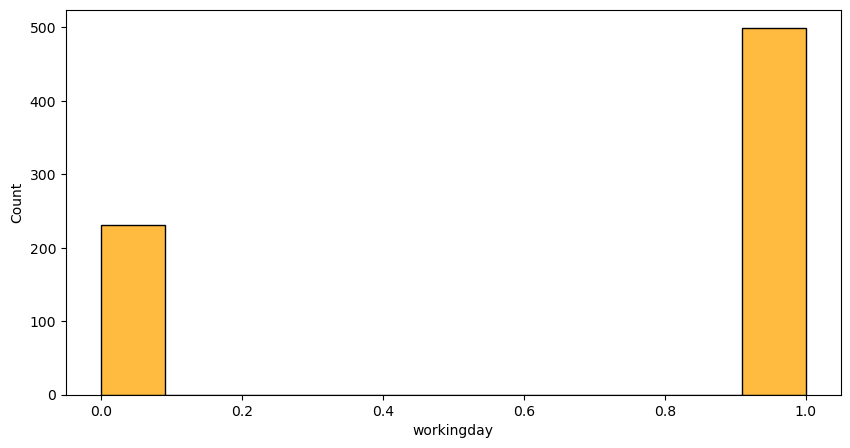

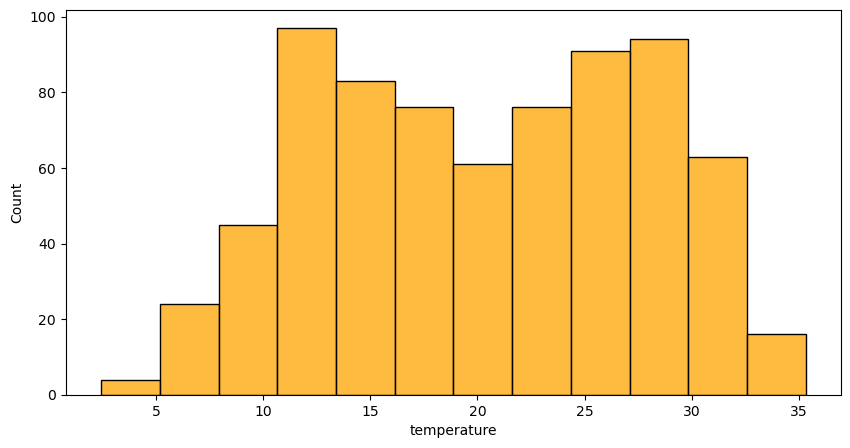

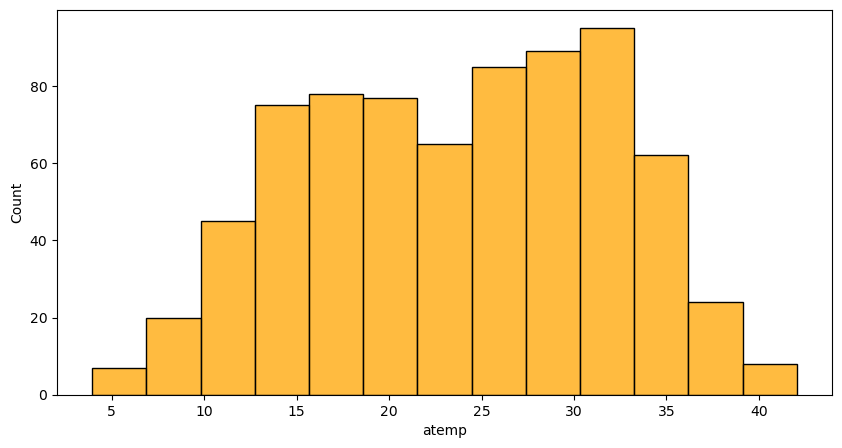

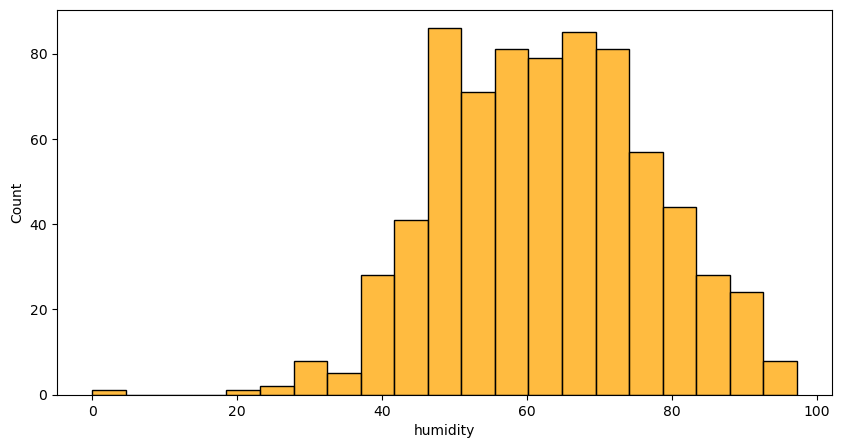

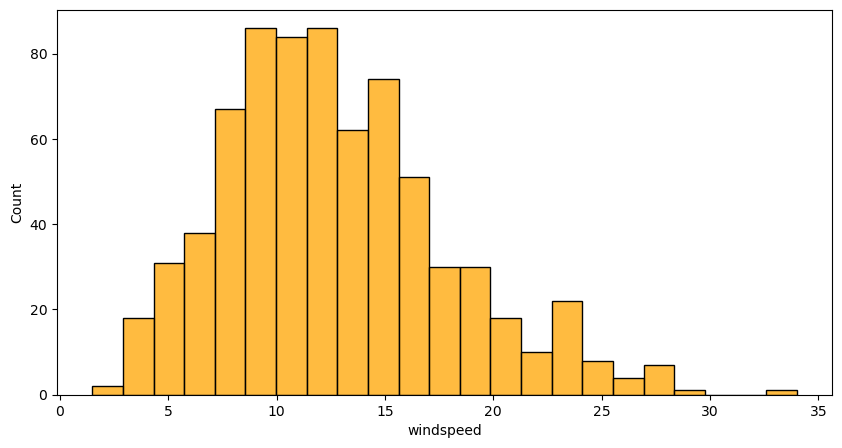

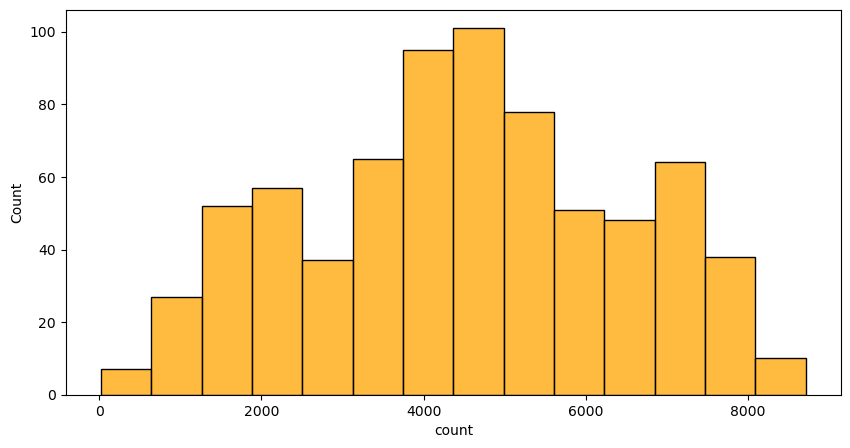

In [145]:
for i in numerical_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i],color='orange') 
    plt.show()

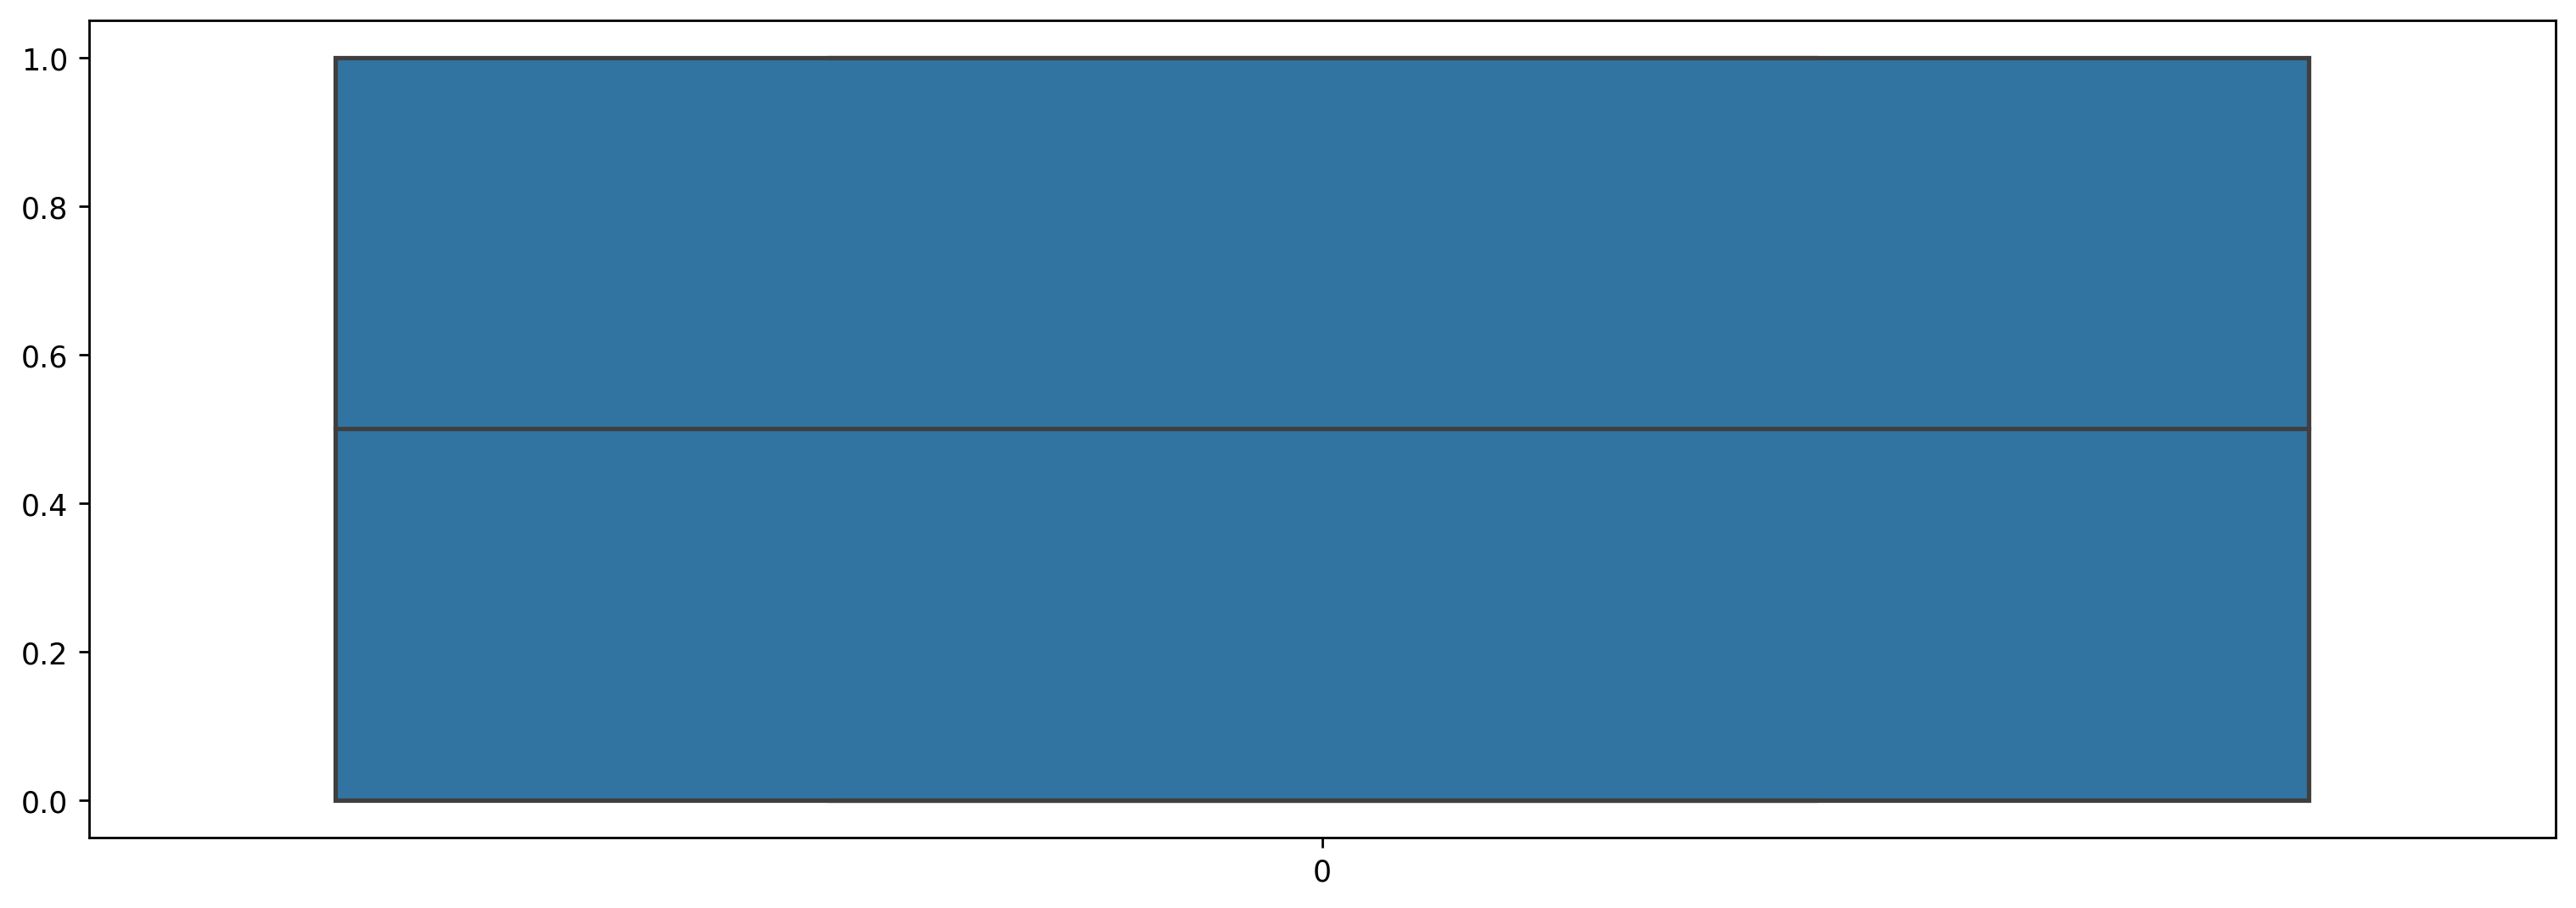

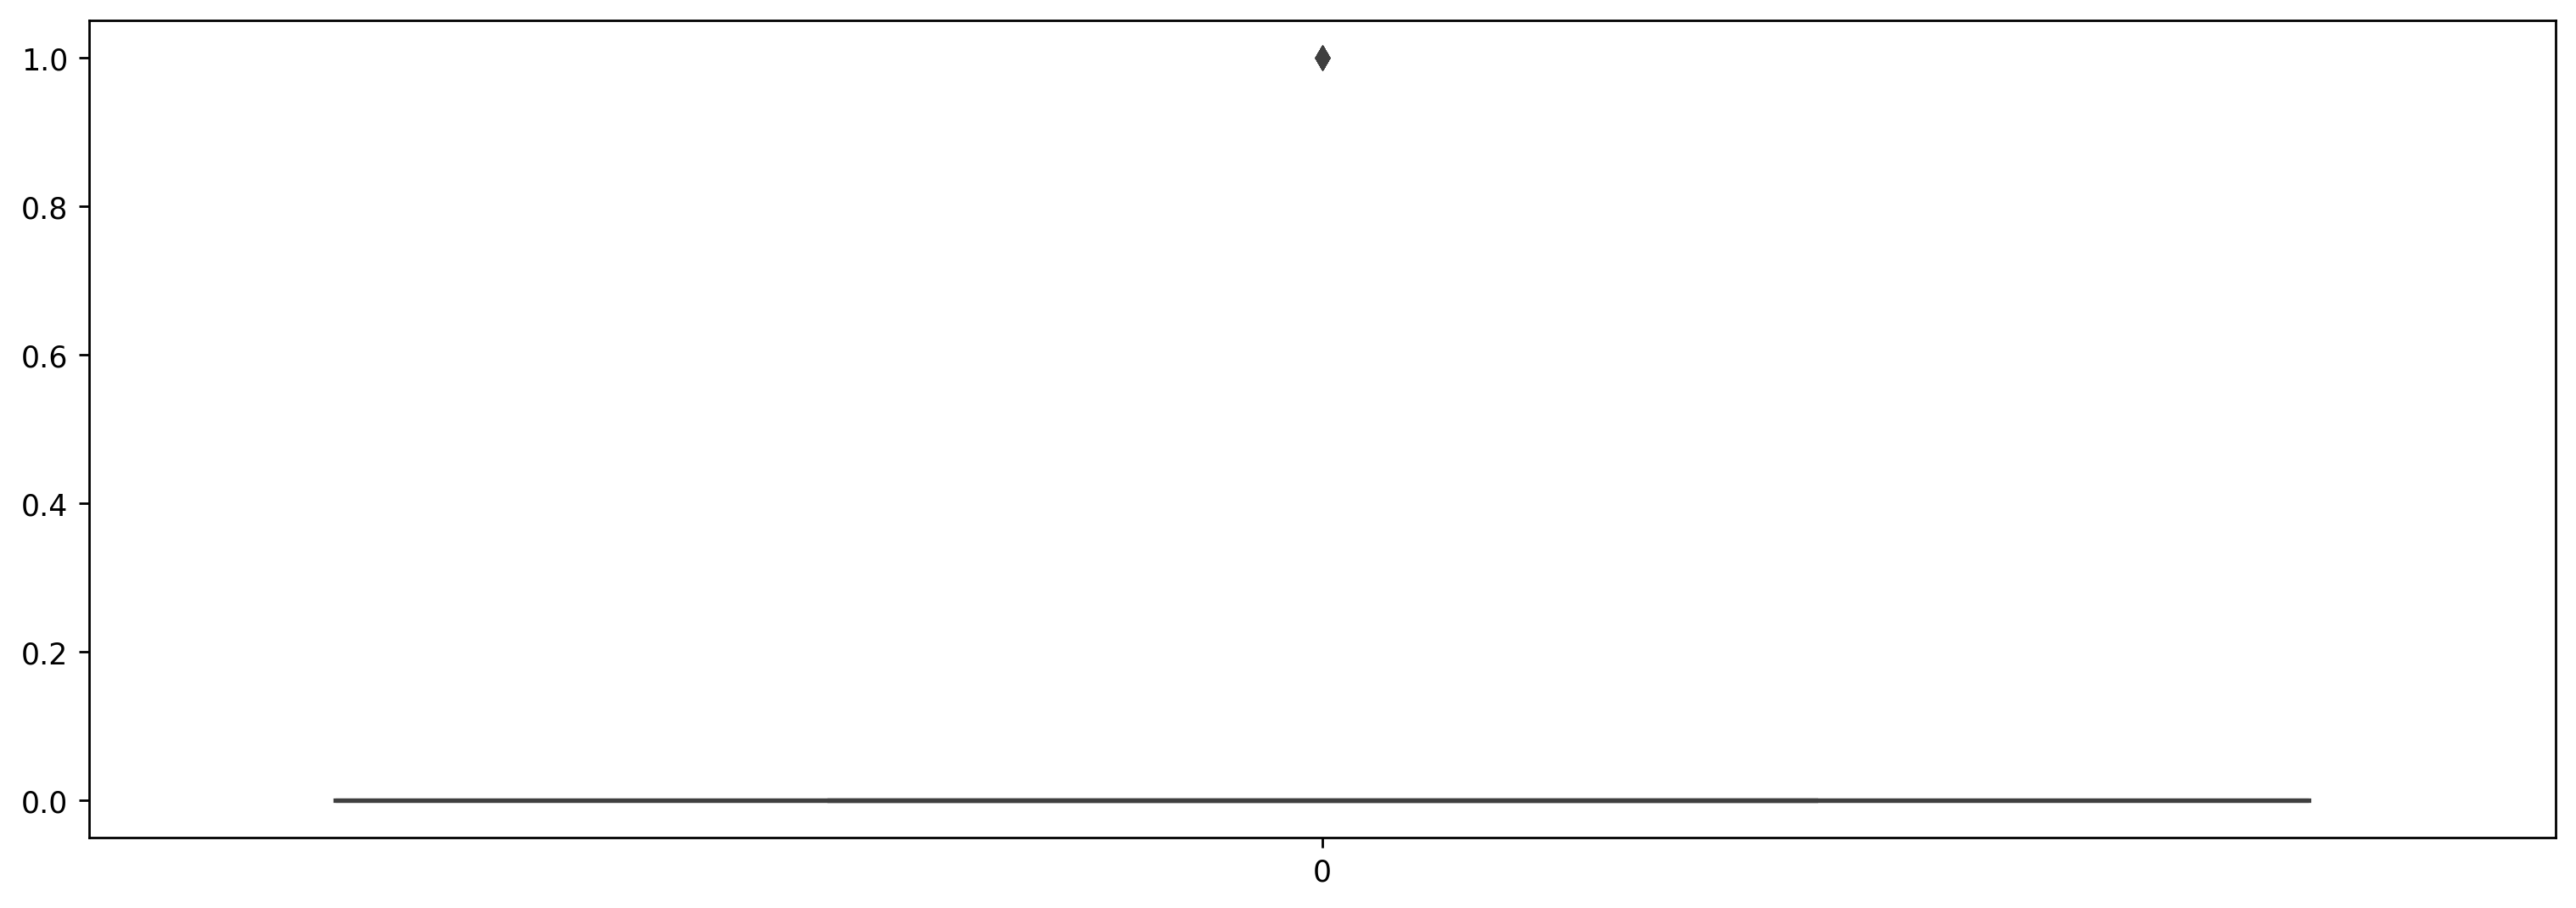

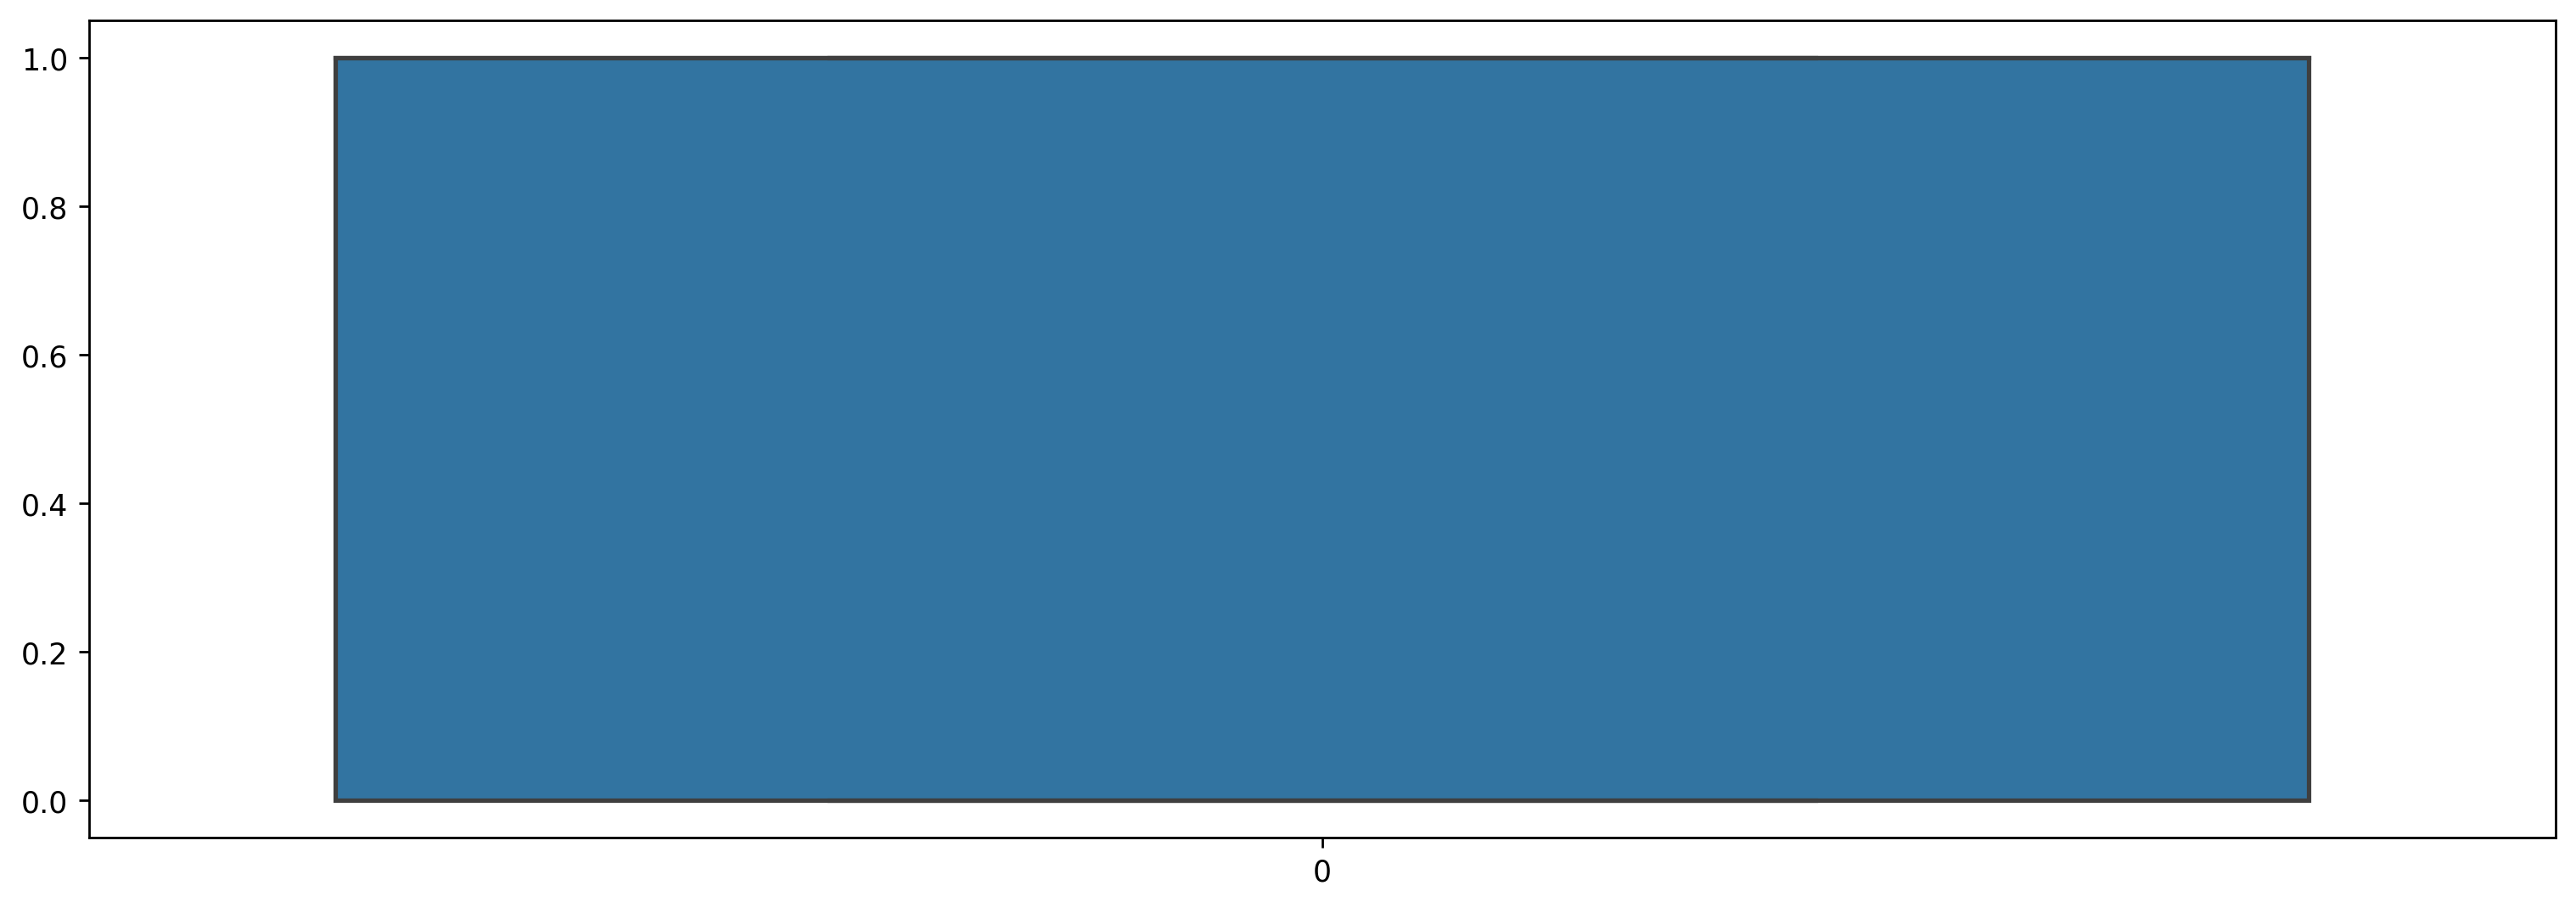

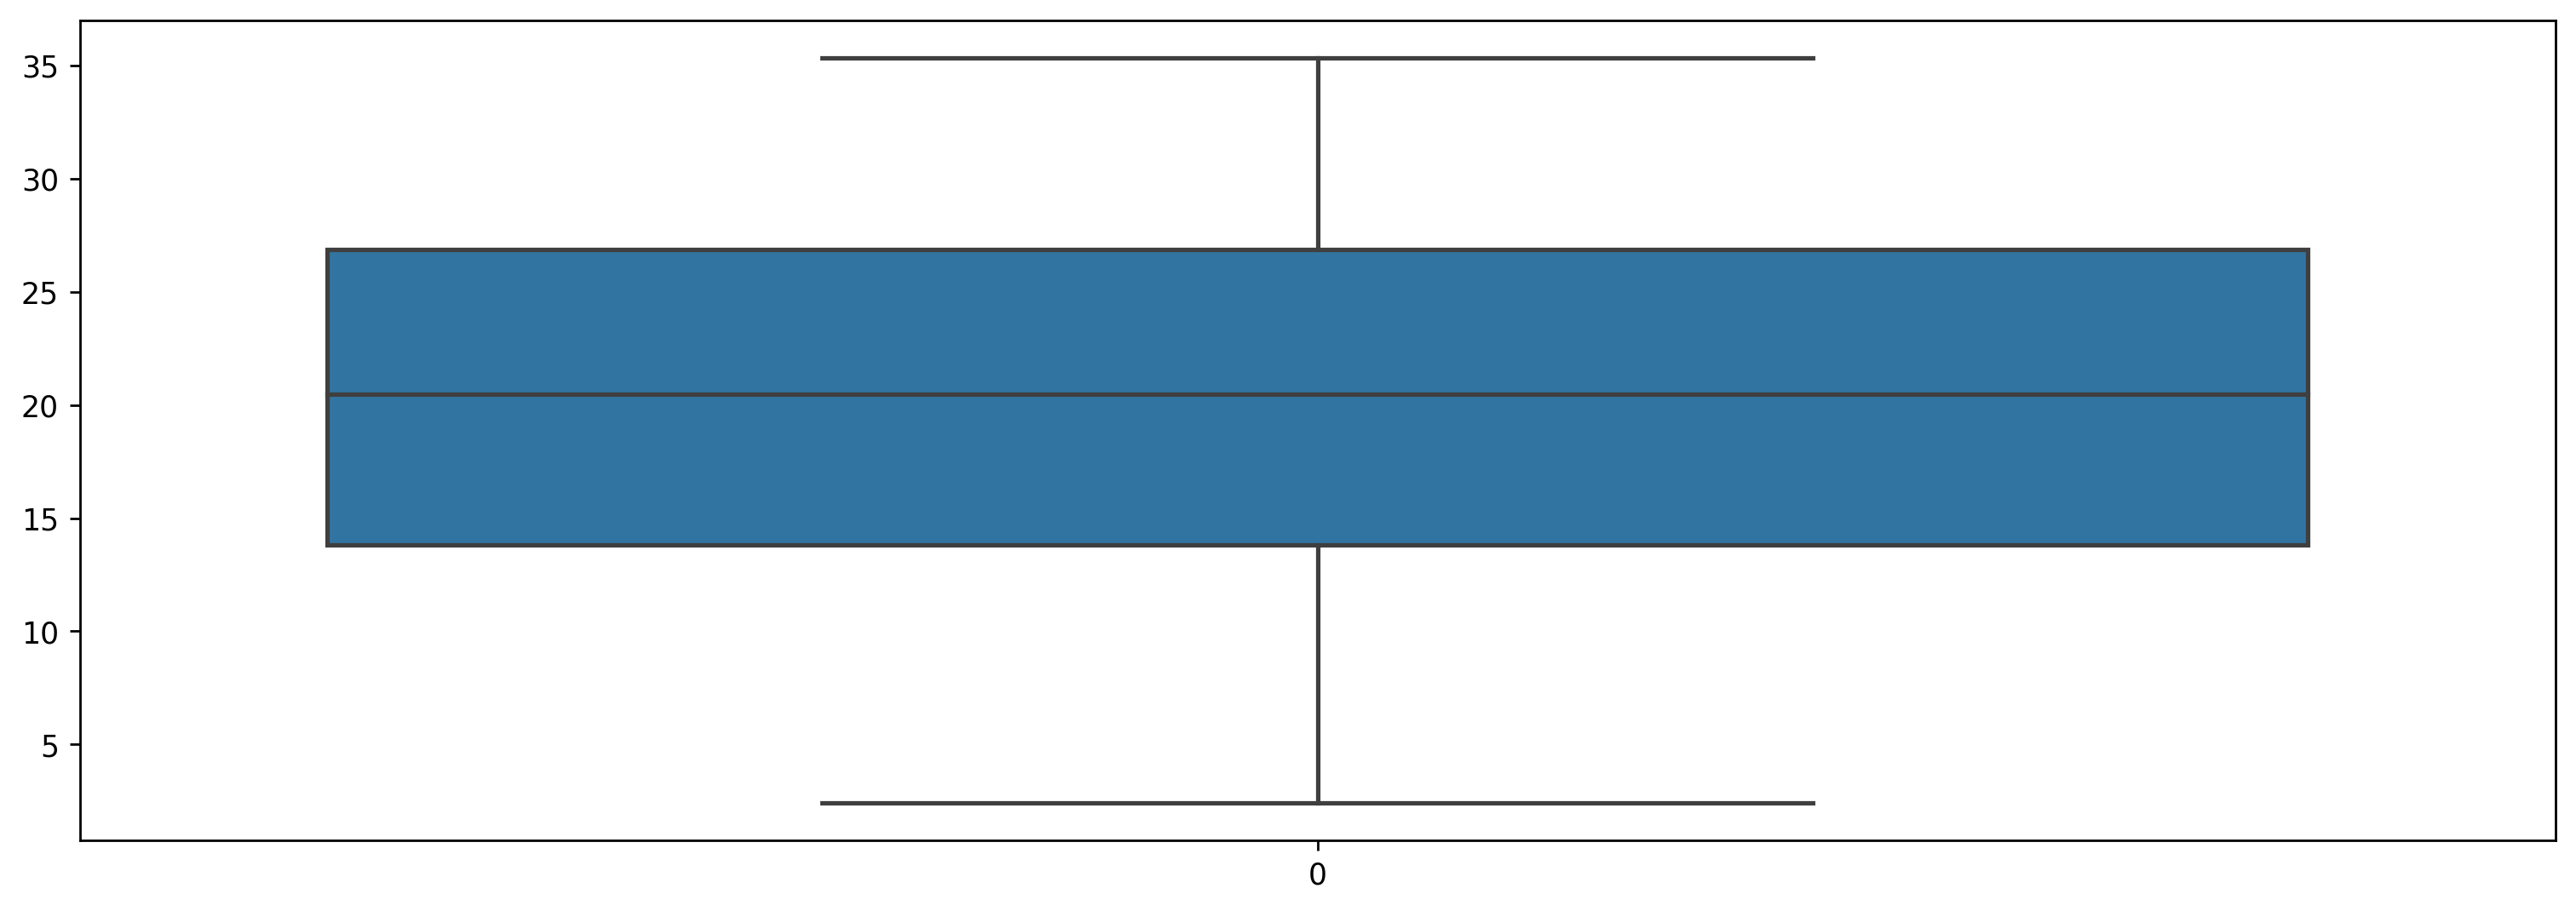

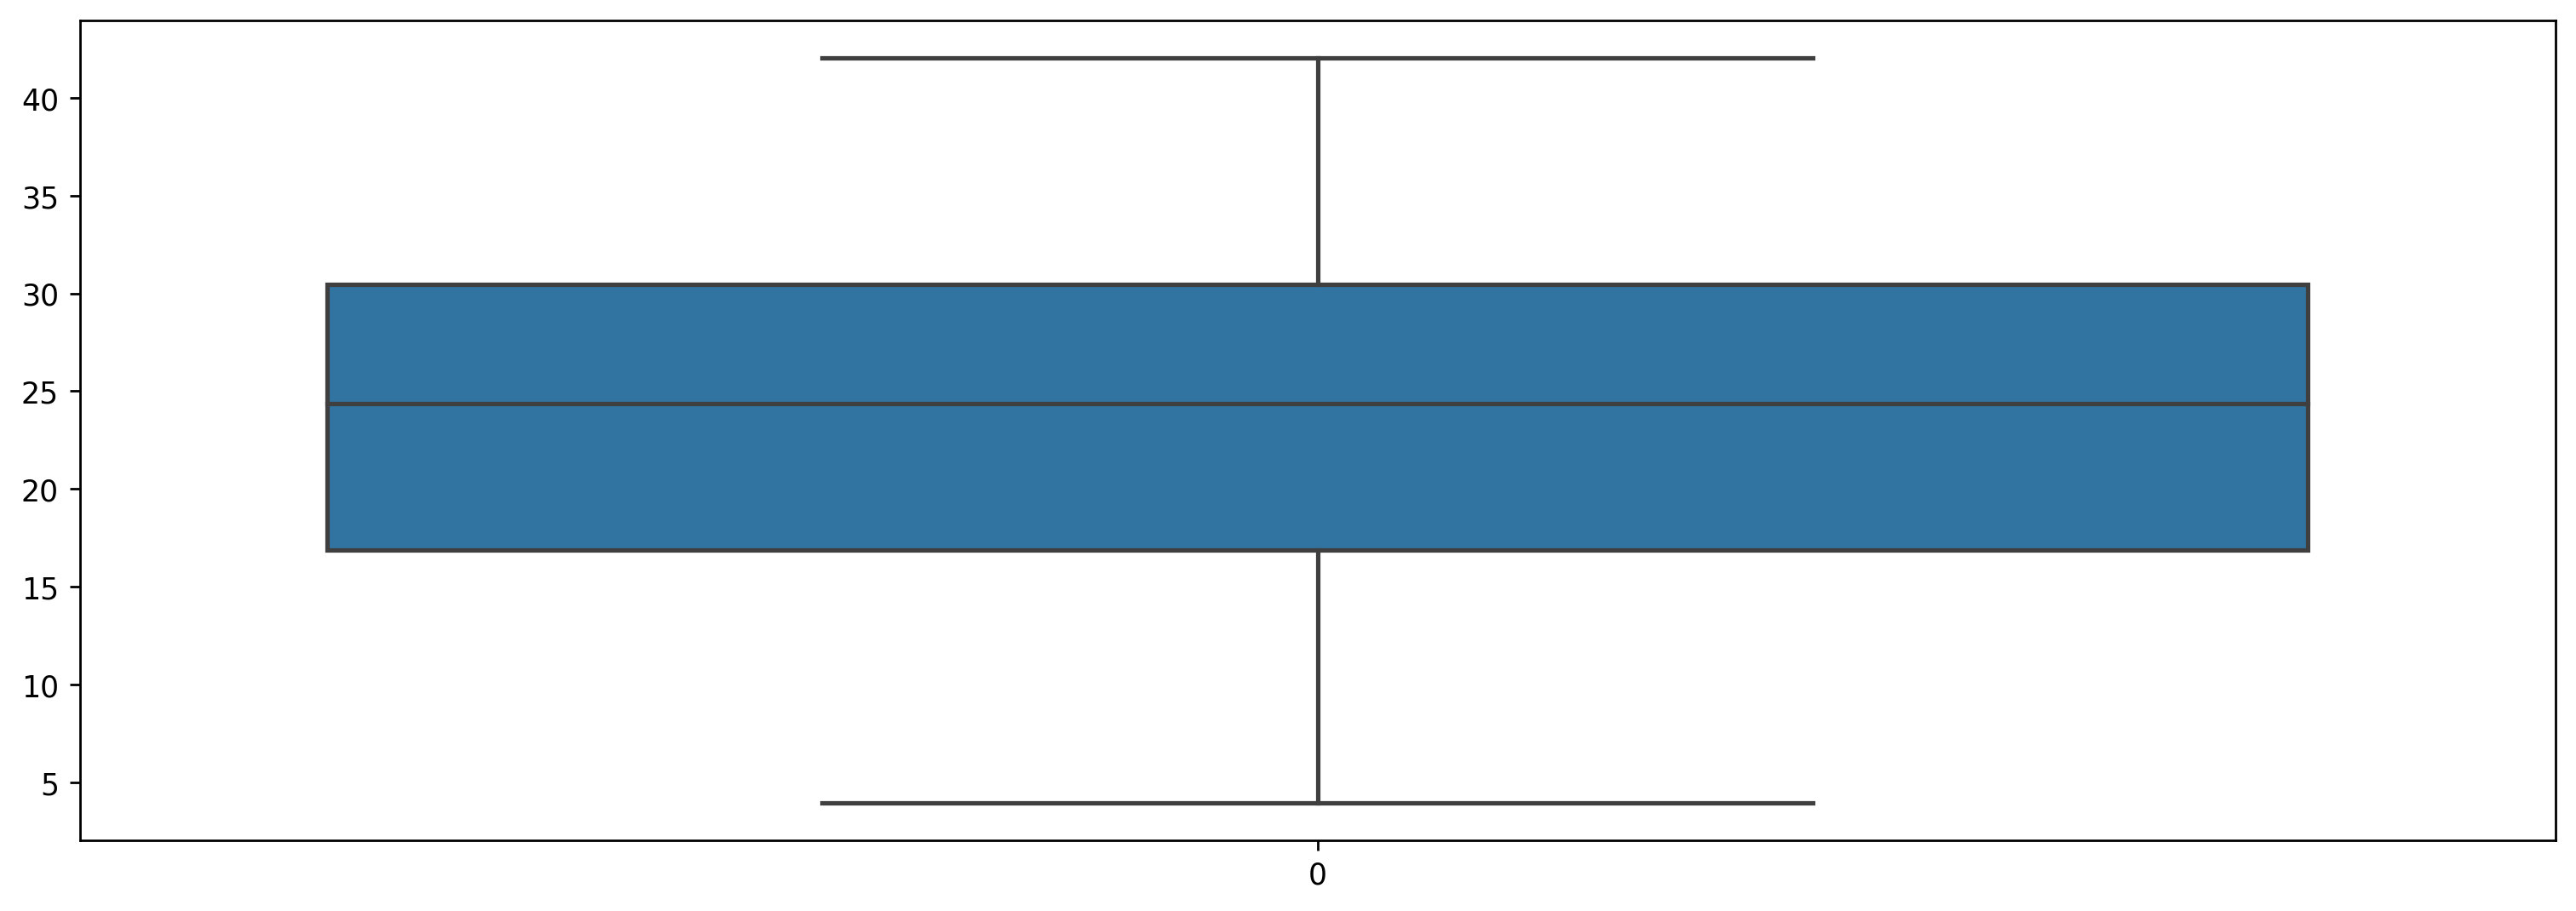

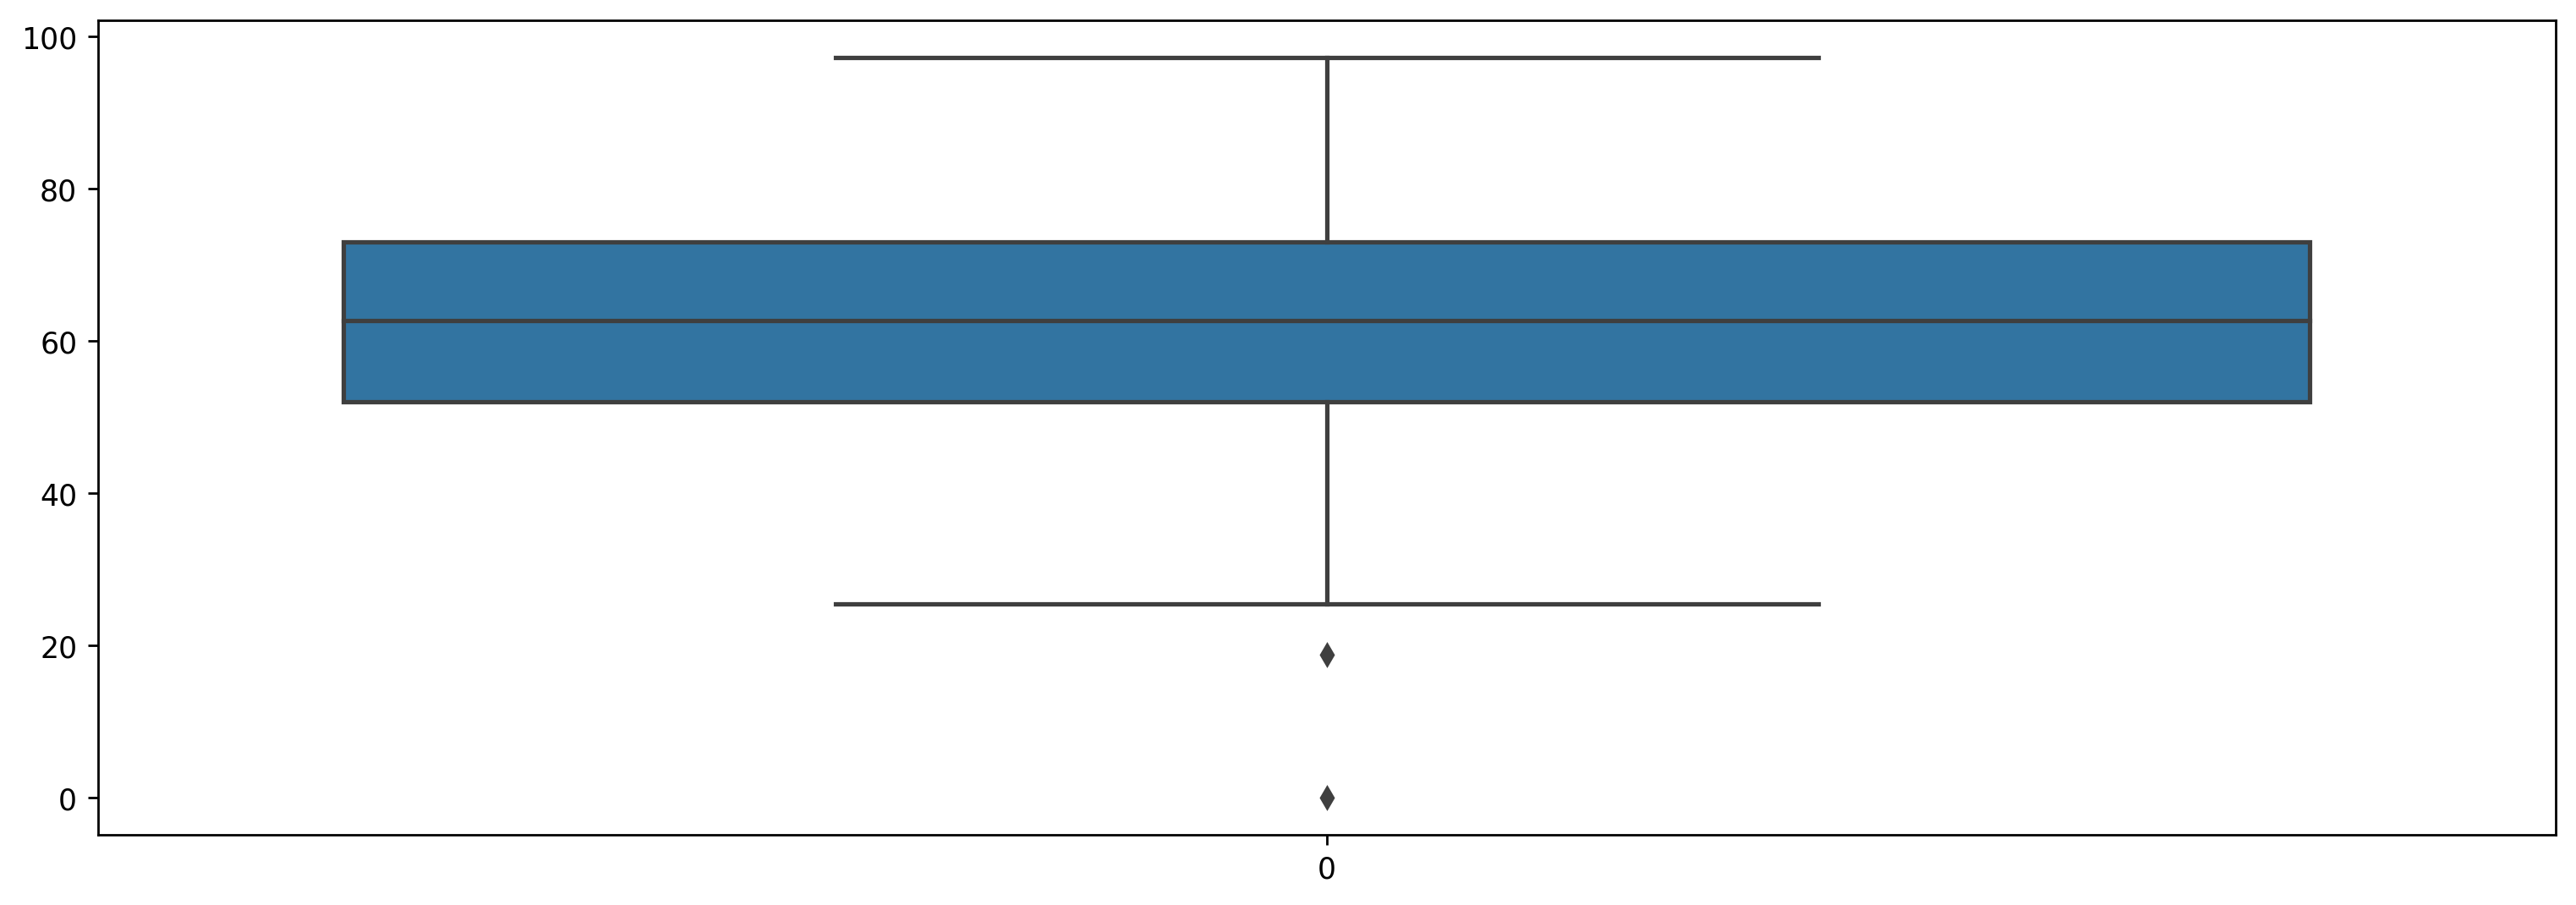

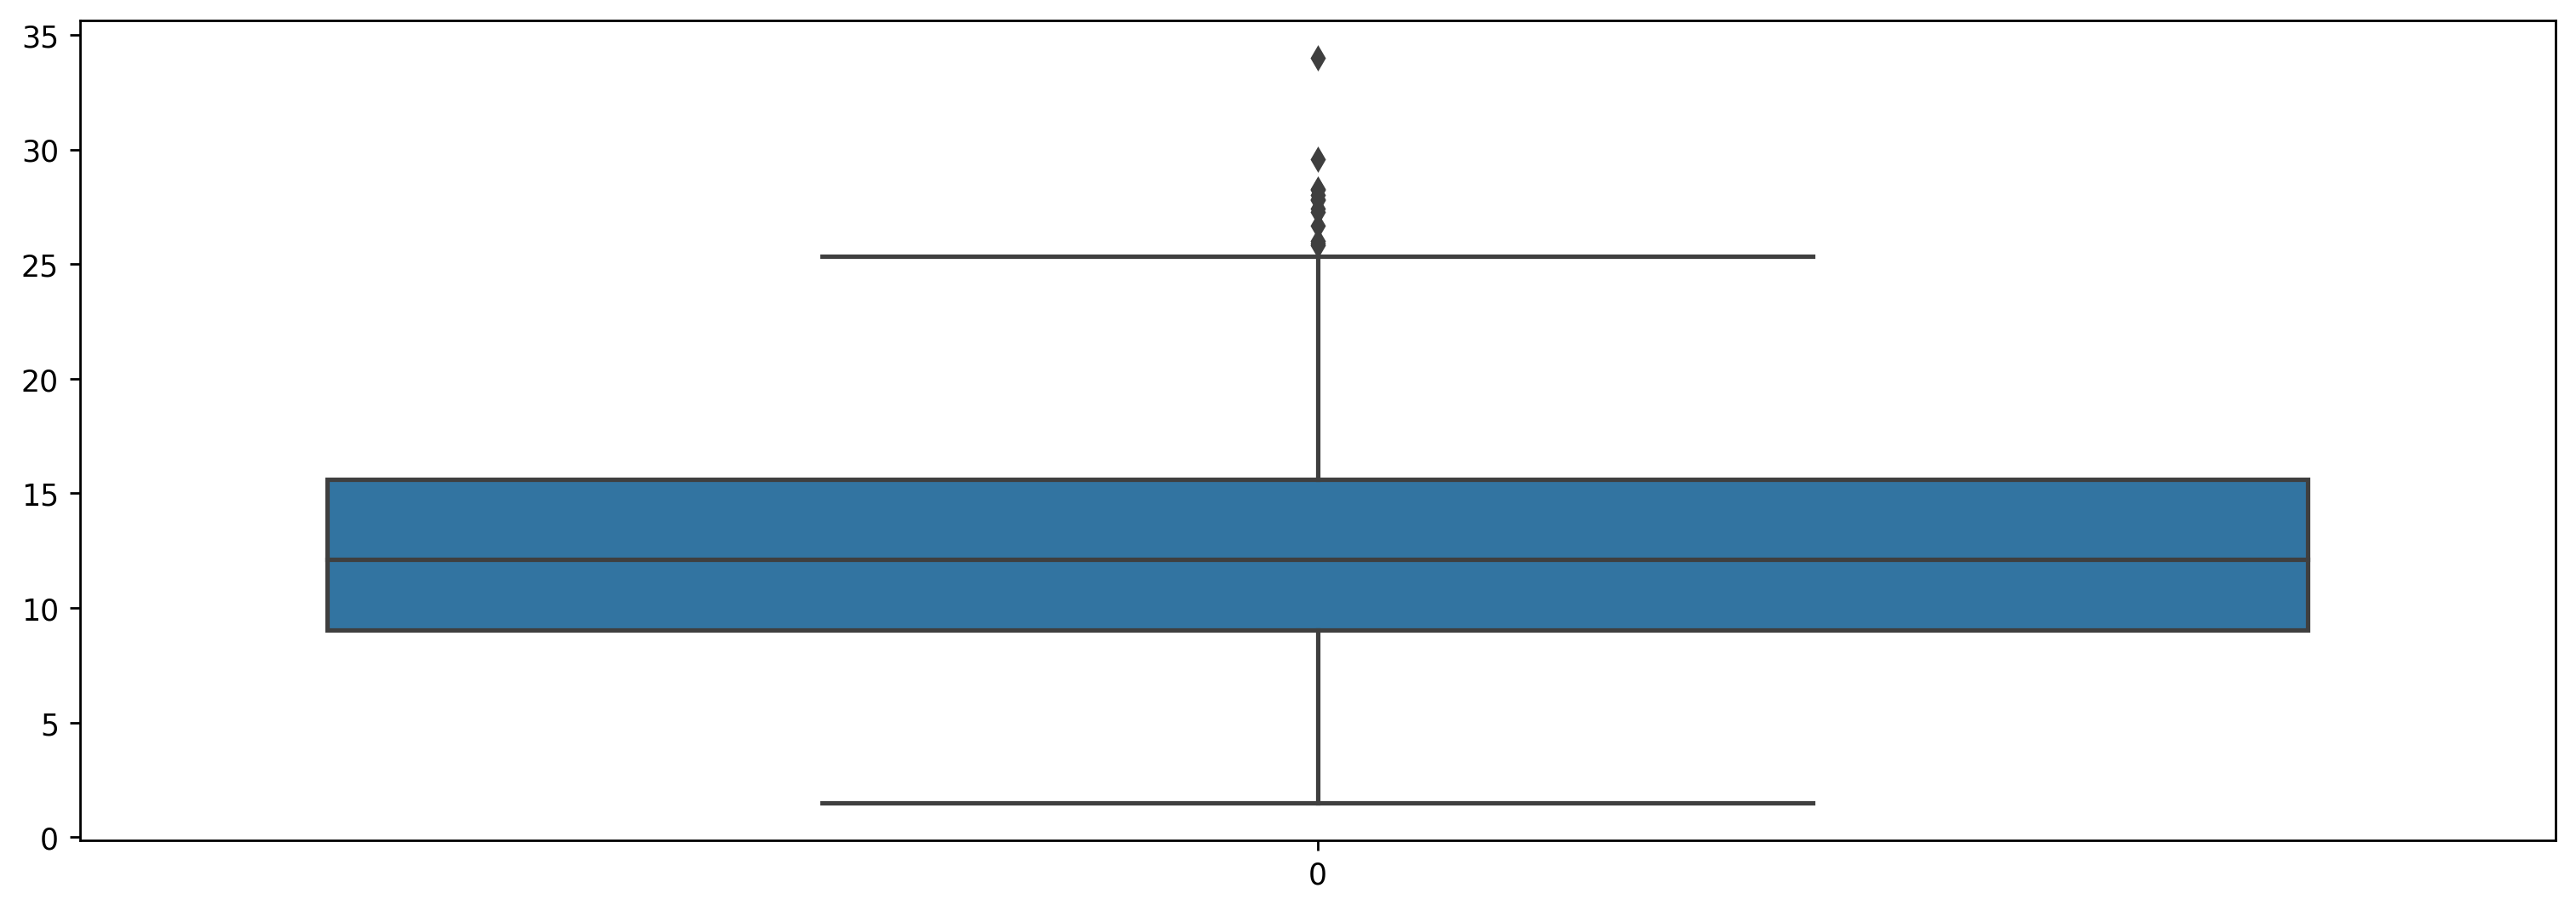

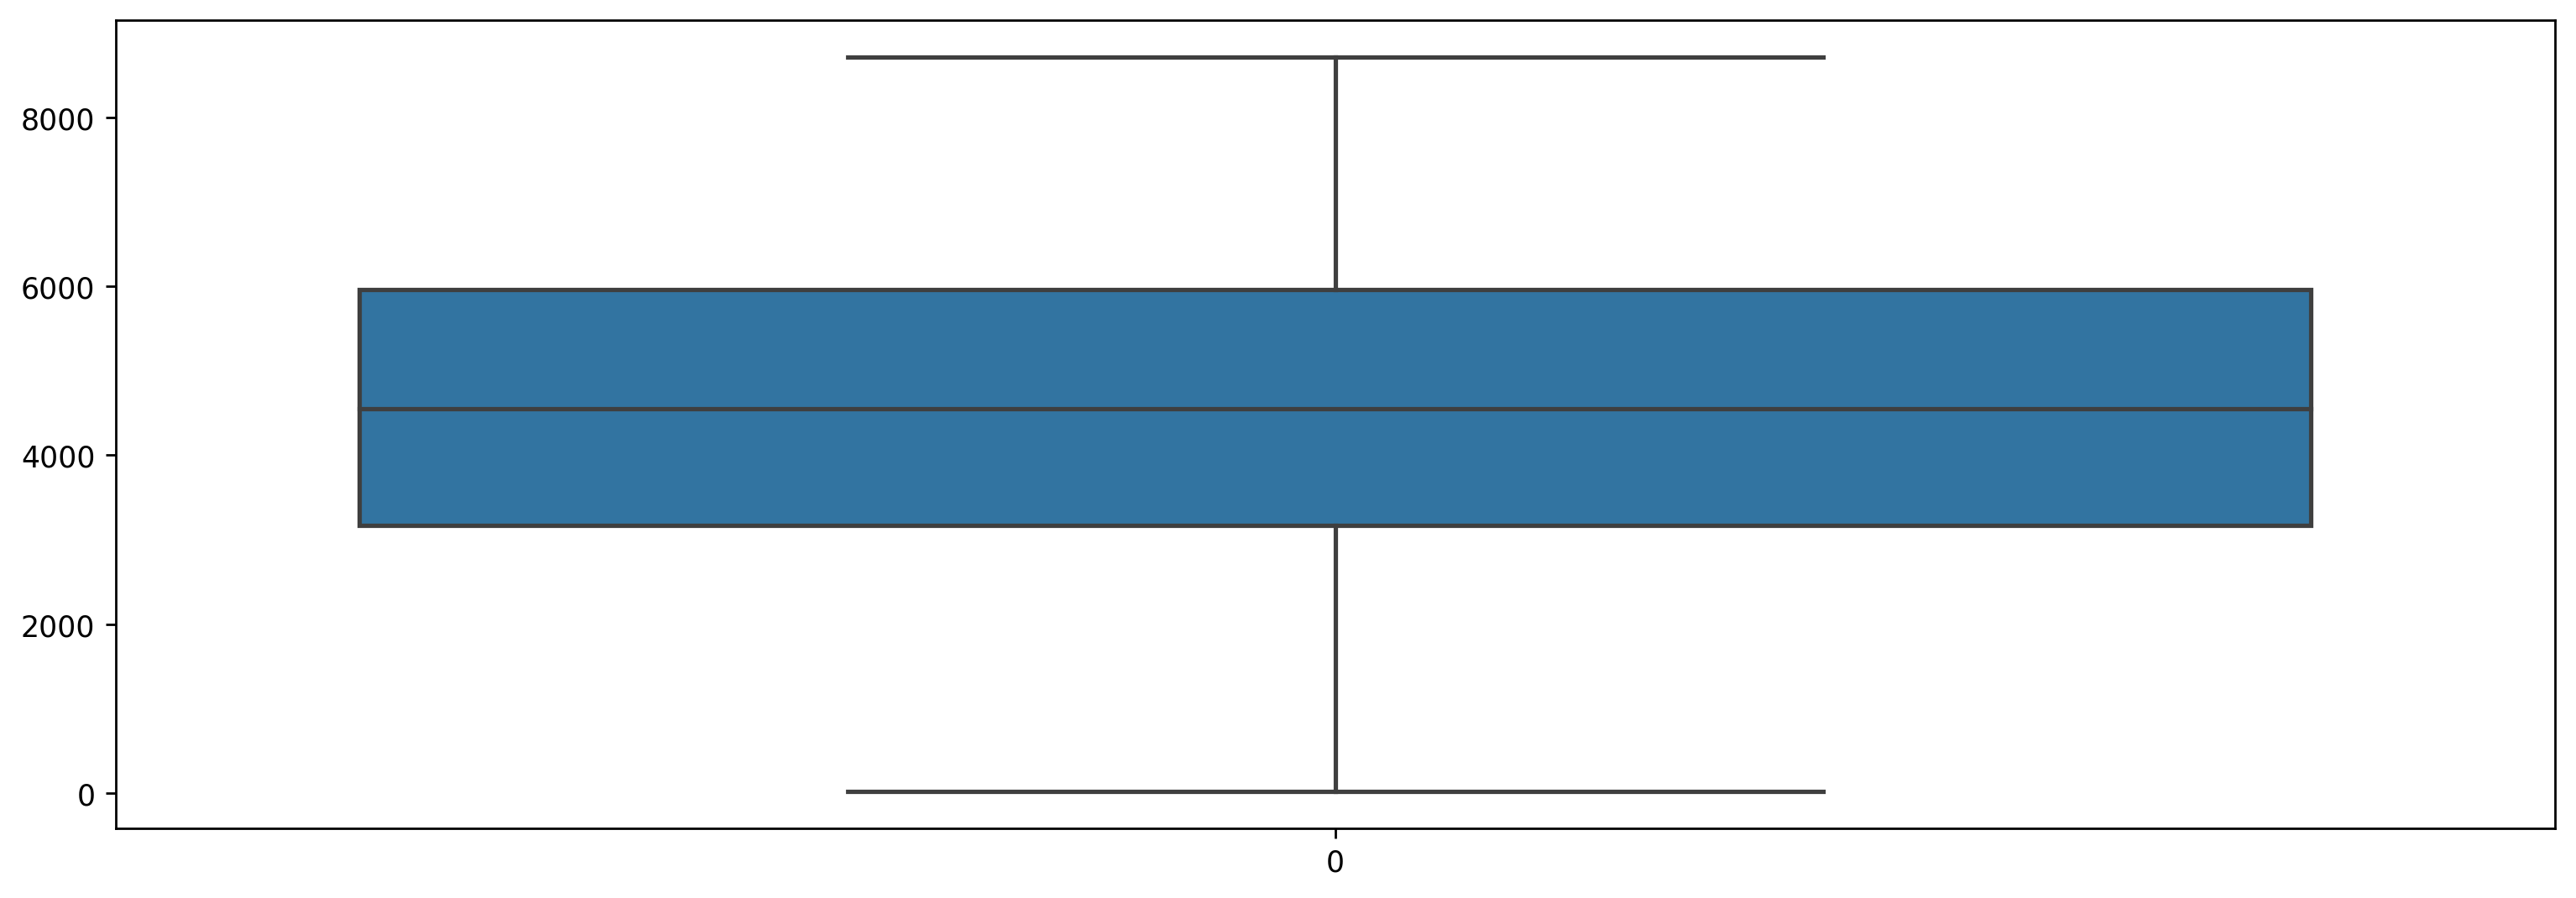

In [146]:
for i in numerical_col:
    plt.figure(figsize=(15,5),dpi=250)
    sns.boxplot(df[i])
    plt.show()

In [147]:
print("Mean of Numerical columns")
for i in numerical_col:
    print(i, " :: ", np.mean(df[i]))

Mean of Numerical columns
year  ::  0.5
holiday  ::  0.028767123287671233
workingday  ::  0.6835616438356165
temperature  ::  20.319259216986303
atemp  ::  23.72632162328767
humidity  ::  62.76517493150686
windspeed  ::  12.763619654657534
count  ::  4508.006849315068


In [148]:
print("Standard deviation of Numerical columns")
for i in numerical_col:
    print(i, " :: ", np.std(df[i]))

Standard deviation of Numerical columns
year  ::  0.5
holiday  ::  0.1671513562775448
workingday  ::  0.4650861456895573
temperature  ::  7.501585579761504
atemp  ::  8.144723446547667
humidity  ::  14.22783392815045
windspeed  ::  5.192280689476768
count  ::  1934.685157553342


#### Bivariate Analysis

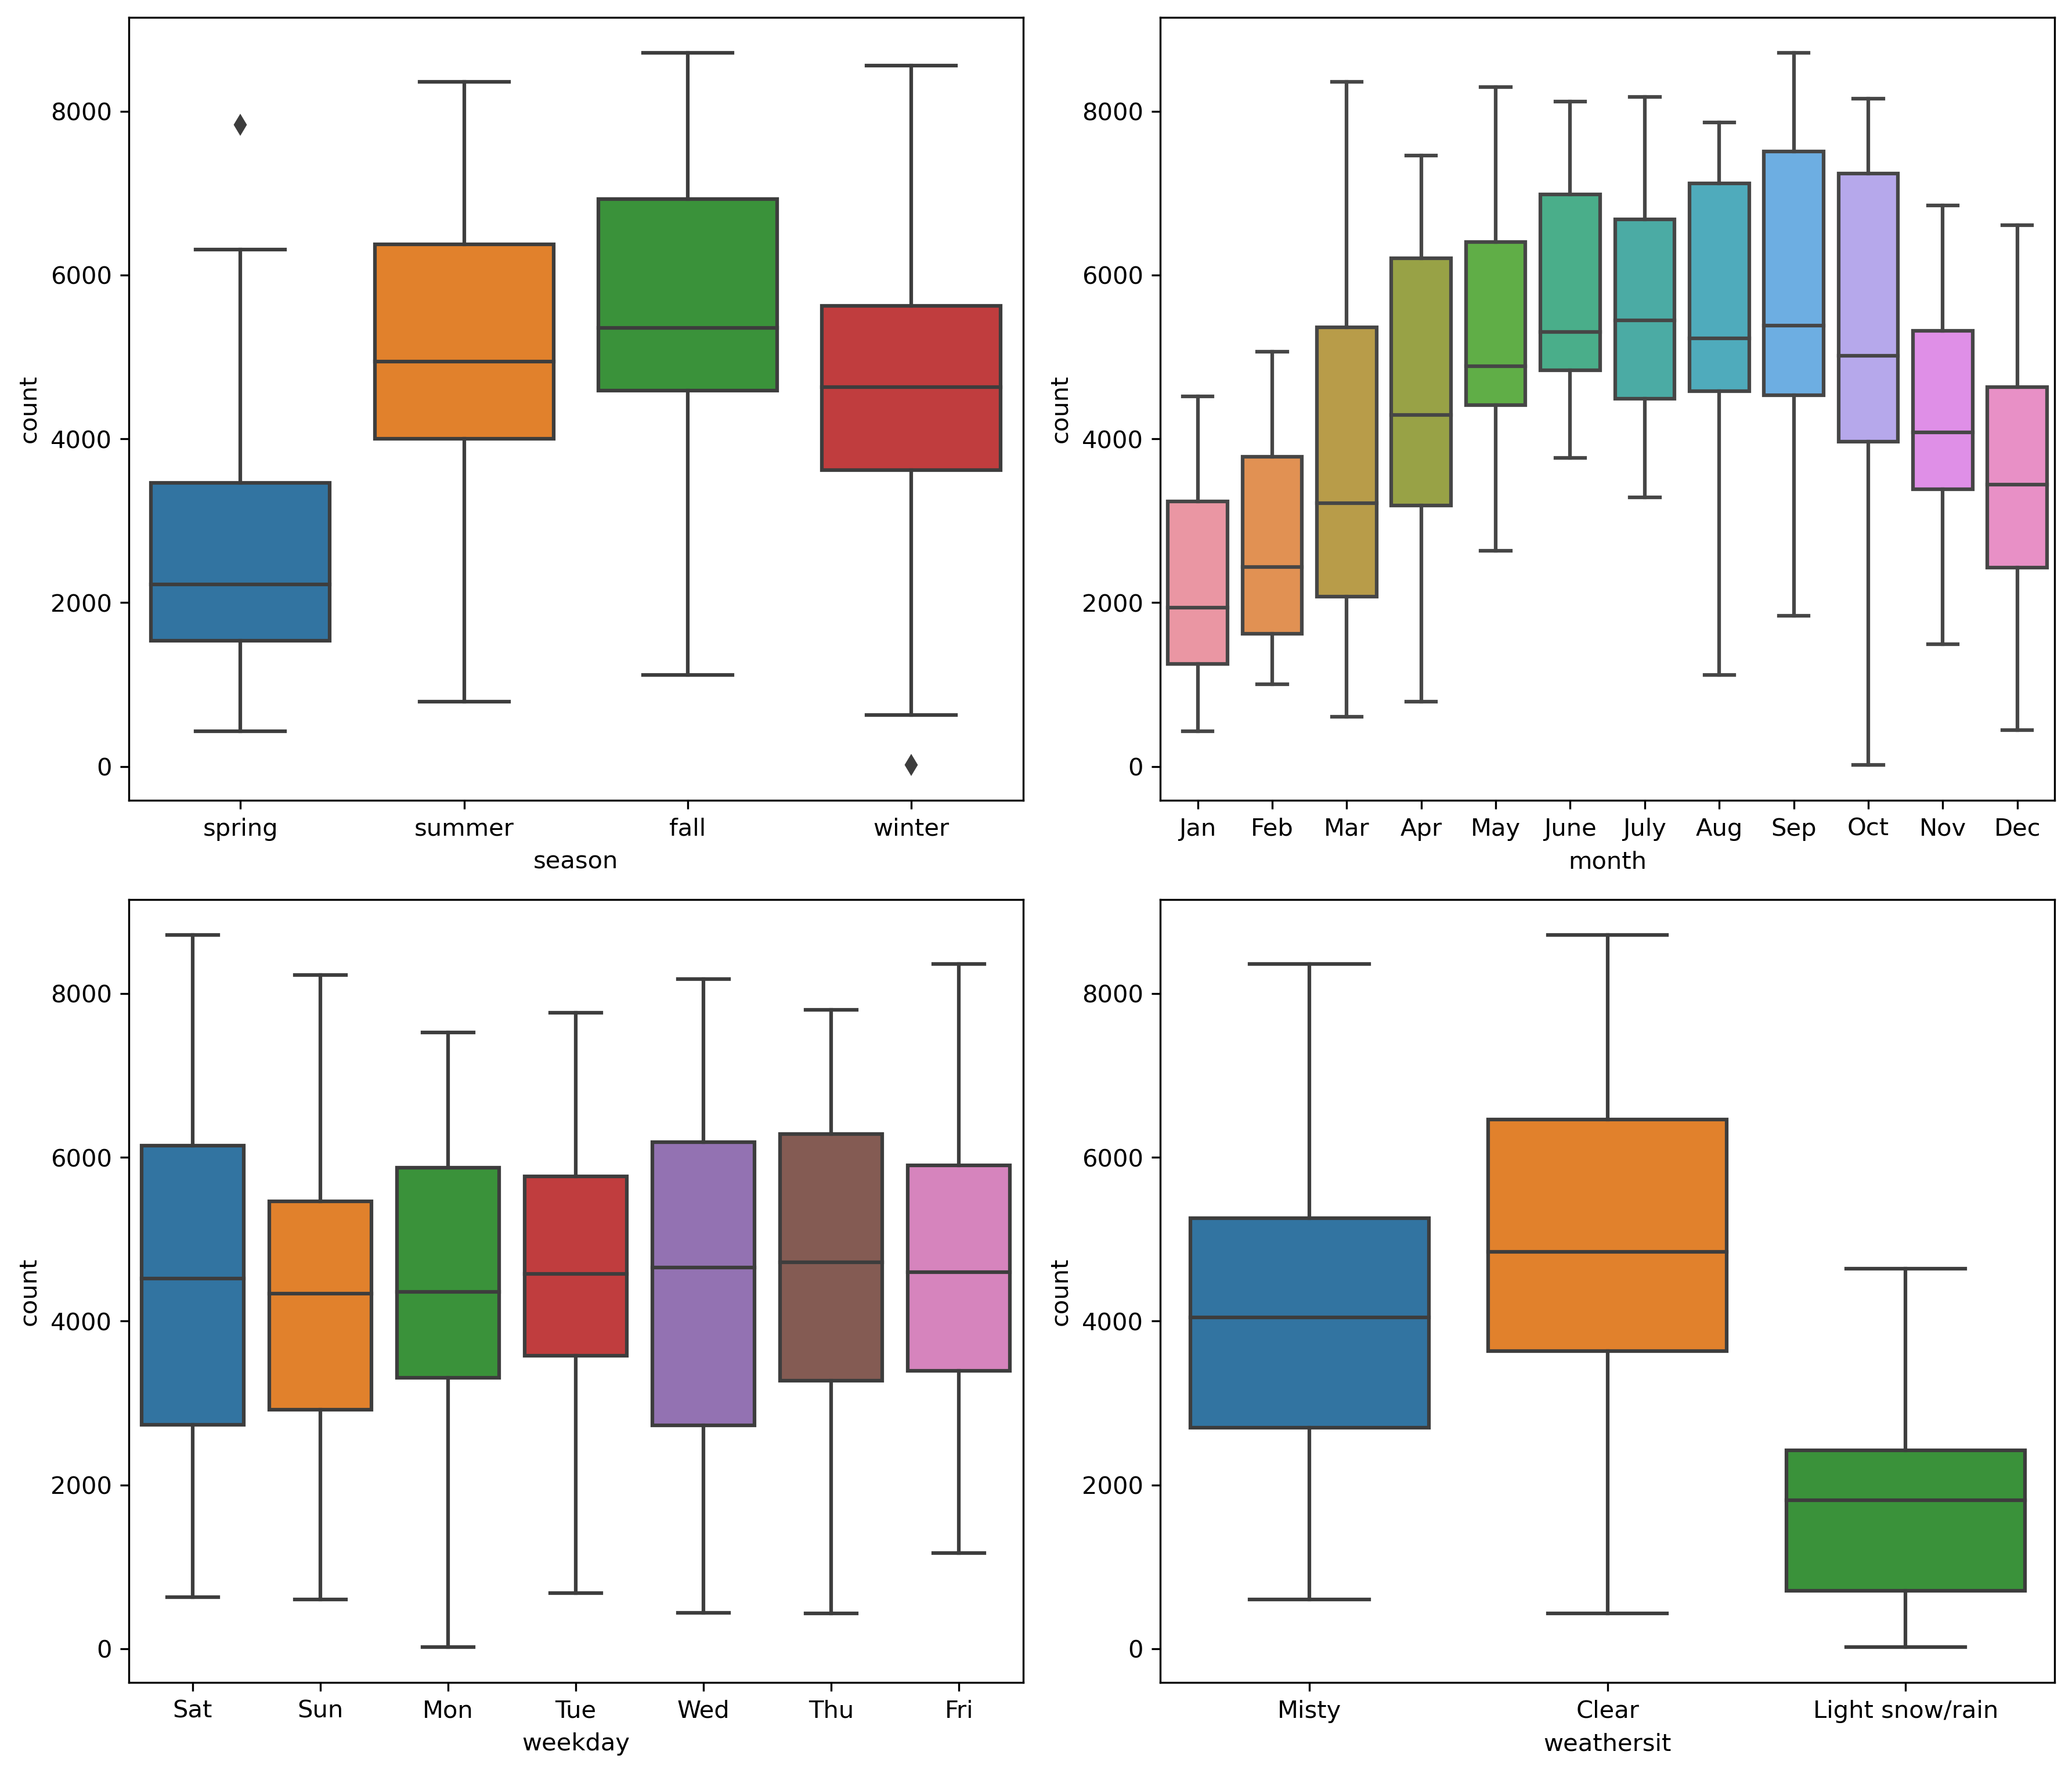

In [149]:
plt.figure(figsize=(12, 20),dpi=300)
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.tight_layout()
plt.show()

#### Bivariate analysis

<Figure size 1500x3000 with 0 Axes>

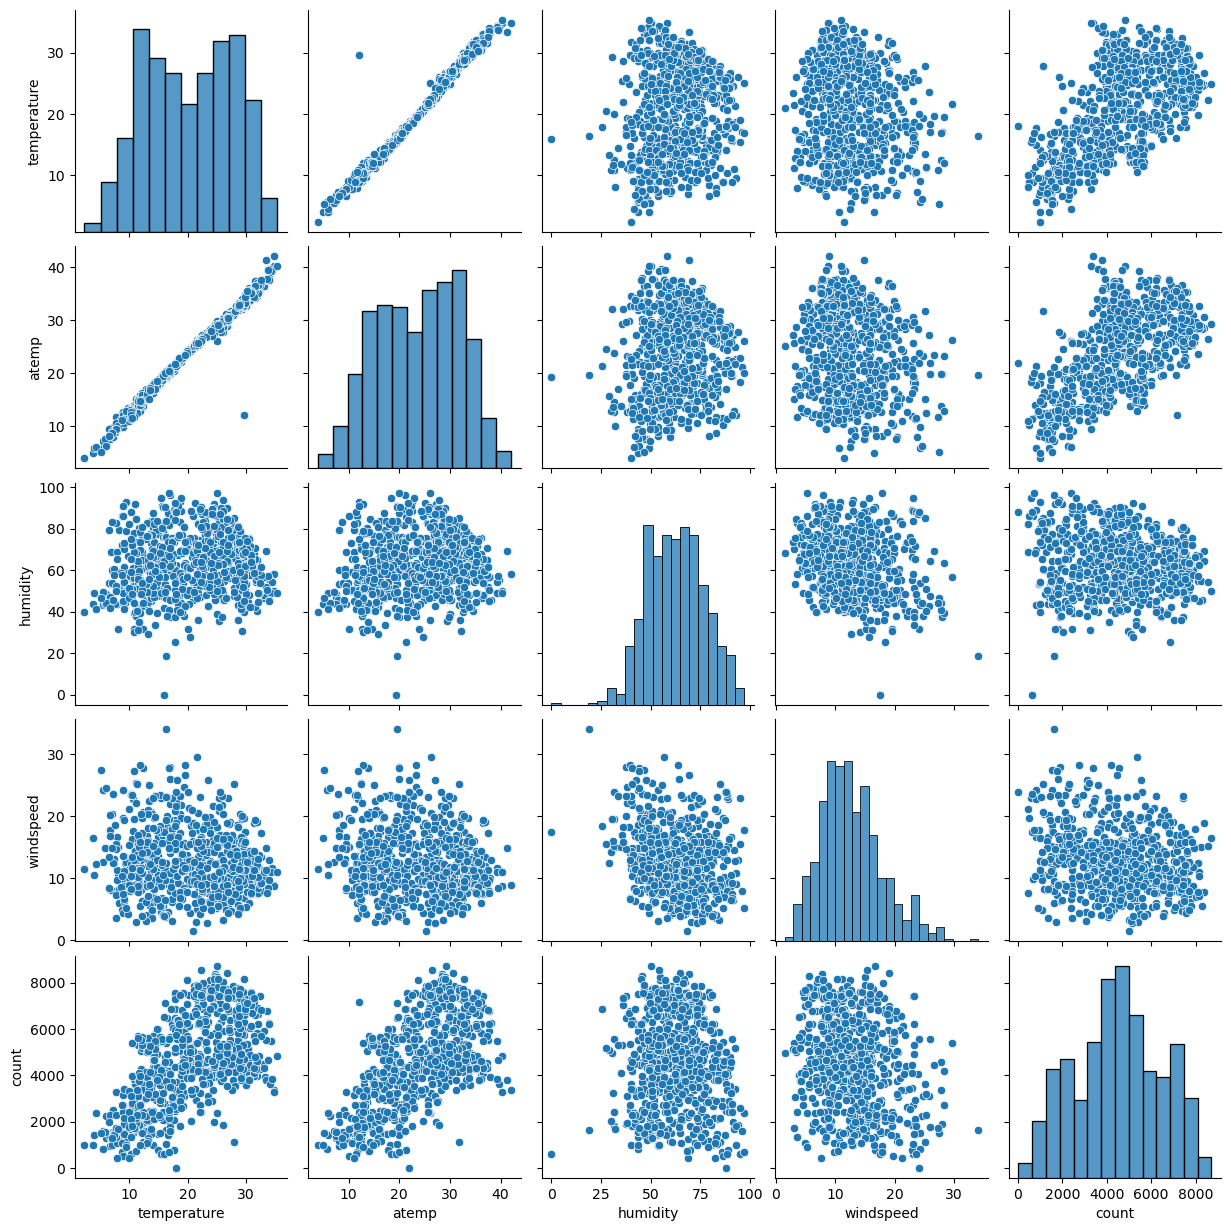

In [150]:
plt.figure(figsize=(5,10),dpi=300)
sns.pairplot(vars=['temperature','atemp','humidity','windspeed','count'],data = df) #Using Pairplot.
plt.show()

In [151]:
# Checking for correlation

num_col = ['temperature','atemp','humidity','windspeed','count']
df[num_col]

temperature     atemp  humidity  windspeed  count
0      14.110847  18.18125   80.5833  10.749882    985
1      14.902598  17.68695   69.6087  16.652113    801
2       8.050924   9.47025   43.7273  16.636703   1349
3       8.200000  10.60610   59.0435  10.739832   1562
4       9.305237  11.46350   43.6957  12.522300   1600
..           ...       ...       ...        ...    ...
725    10.420847  11.33210   65.2917  23.458911   2114
726    10.386653  12.75230   59.0000  10.416557   3095
727    10.386653  12.12000   75.2917   8.333661   1341
728    10.489153  11.58500   48.3333  23.500518   1796
729     8.849153  11.17435   57.7500  10.374682   2729

[730 rows x 5 columns]

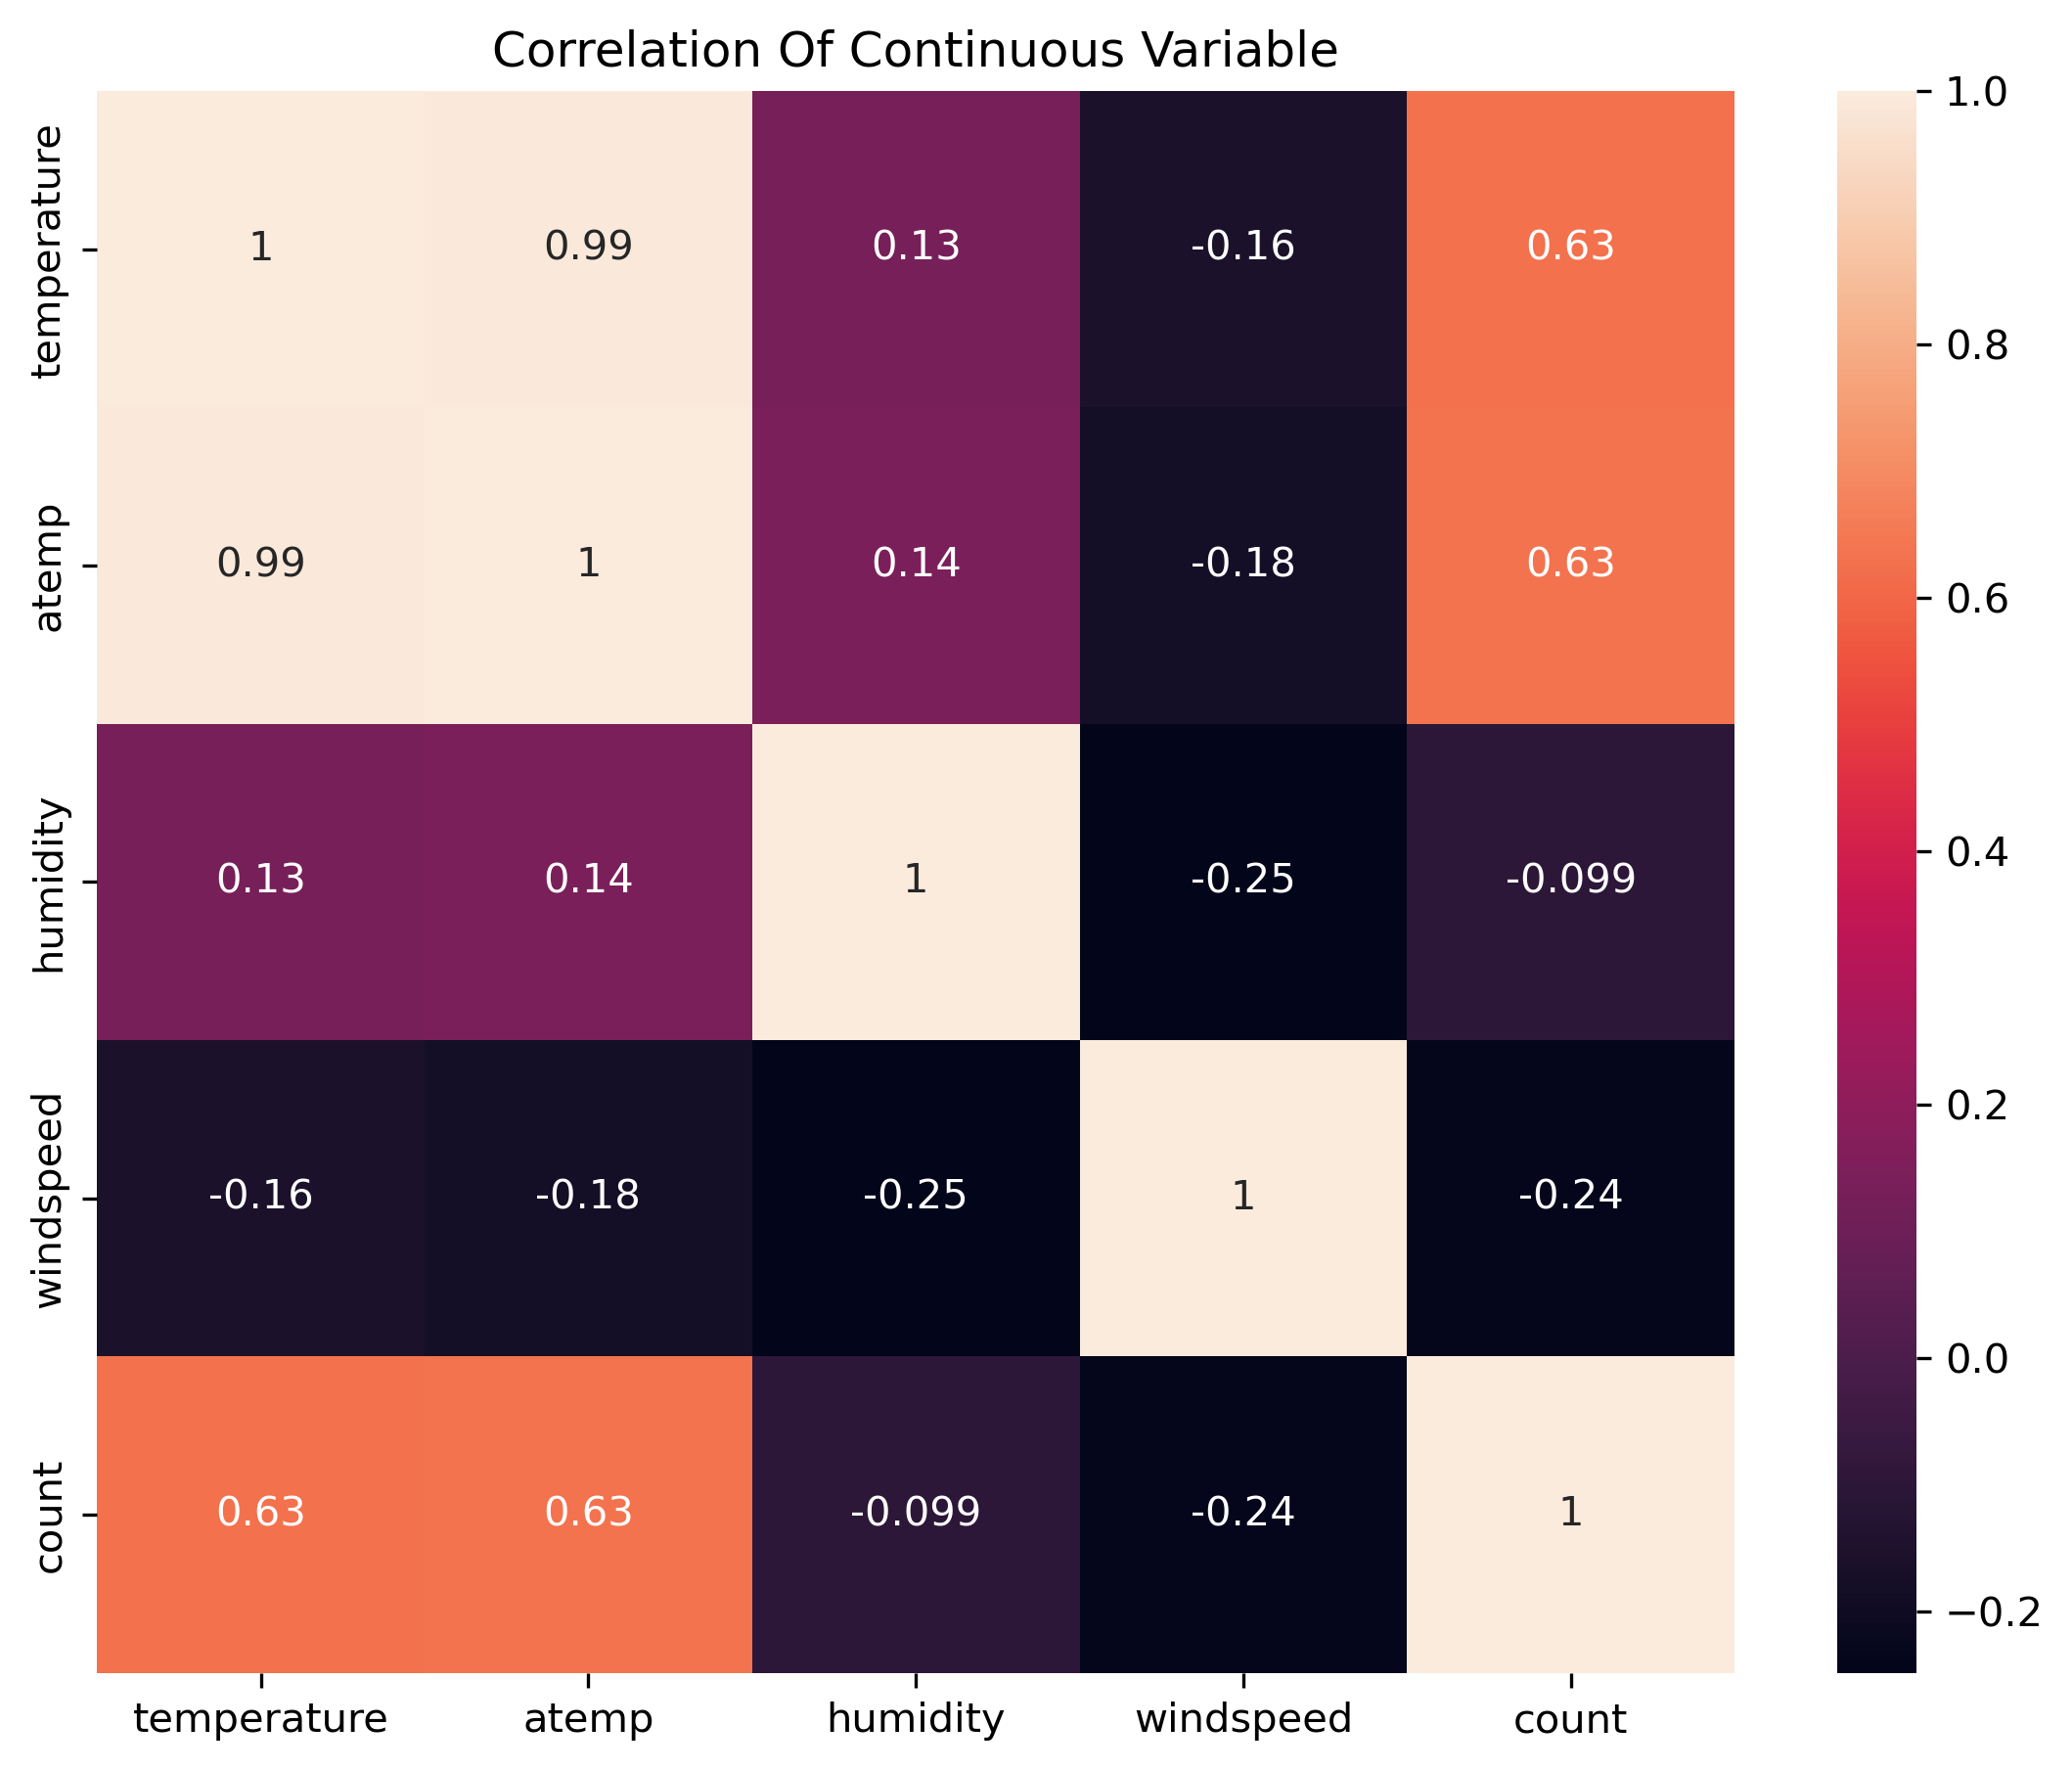

In [152]:
# Correlation matrix
plt.figure(figsize=(9,7),dpi=300)
sns.heatmap(df[num_col].corr(),annot=True)
plt.title('Correlation Of Continuous Variable');

In [153]:
# Creating dummy variables for nominal categorical data
months_dum = pd.get_dummies(df.month,drop_first=True)
weekdays_dum = pd.get_dummies(df.weekday,drop_first=True)
weathersit_dum = pd.get_dummies(df.weathersit,drop_first=True)
seasons_dum = pd.get_dummies(df.season,drop_first=True)

In [154]:
months_dum.head()


Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0     0    0    0    0    0    0
1    0    0    0    1     0     0    0    0    0    0    0
2    0    0    0    1     0     0    0    0    0    0    0
3    0    0    0    1     0     0    0    0    0    0    0
4    0    0    0    1     0     0    0    0    0    0    0

In [155]:
weekdays_dum.head()

Mon  Sat  Sun  Thu  Tue  Wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1

In [156]:
weathersit_dum.head()

Light snow/rain  Misty
0                0      1
1                0      1
2                0      0
3                0      0
4                0      0

In [157]:
seasons_dum.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [158]:
# Concatinating the dummy variables with the data frame
new_df = pd.concat([df,months_dum,weekdays_dum,weathersit_dum,seasons_dum],axis=1)

In [159]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   year             730 non-null    int64  
 2   month            730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temperature      730 non-null    float64
 8   atemp            730 non-null    float64
 9   humidity         730 non-null    float64
 10  windspeed        730 non-null    float64
 11  count            730 non-null    int64  
 12  Aug              730 non-null    uint8  
 13  Dec              730 non-null    uint8  
 14  Feb              730 non-null    uint8  
 15  Jan              730 non-null    uint8  
 16  July             730 non-null    uint8  
 17  June            

In [160]:
# Dropping the original nominal categorical features
column_to_drop = ['weekday', 'month', 'season', 'weathersit']
new_df.drop(column_to_drop, axis=1, inplace=True)

In [161]:
new_df.head()

year  holiday  workingday  temperature     atemp  humidity  windspeed  \
0     0        0           0    14.110847  18.18125   80.5833  10.749882   
1     0        0           0    14.902598  17.68695   69.6087  16.652113   
2     0        0           1     8.050924   9.47025   43.7273  16.636703   
3     0        0           1     8.200000  10.60610   59.0435  10.739832   
4     0        0           1     9.305237  11.46350   43.6957  12.522300   

   count  Aug  Dec  ...  Sat  Sun  Thu  Tue  Wed  Light snow/rain  Misty  \
0    985    0    0  ...    1    0    0    0    0                0      1   
1    801    0    0  ...    0    1    0    0    0                0      1   
2   1349    0    0  ...    0    0    0    0    0                0      0   
3   1562    0    0  ...    0    0    0    1    0                0      0   
4   1600    0    0  ...    0    0    0    0    1                0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 30 columns]

#### Splitting into train test split

In [162]:
np.random.seed(0)
df_train, df_test = train_test_split(new_df, test_size = 0.3, random_state = 100)

#### Scaling the numerical columns

In [163]:
scale = MinMaxScaler()
df_train[num_col] = scale.fit_transform(df_train[num_col])

#### Correlation of the columns

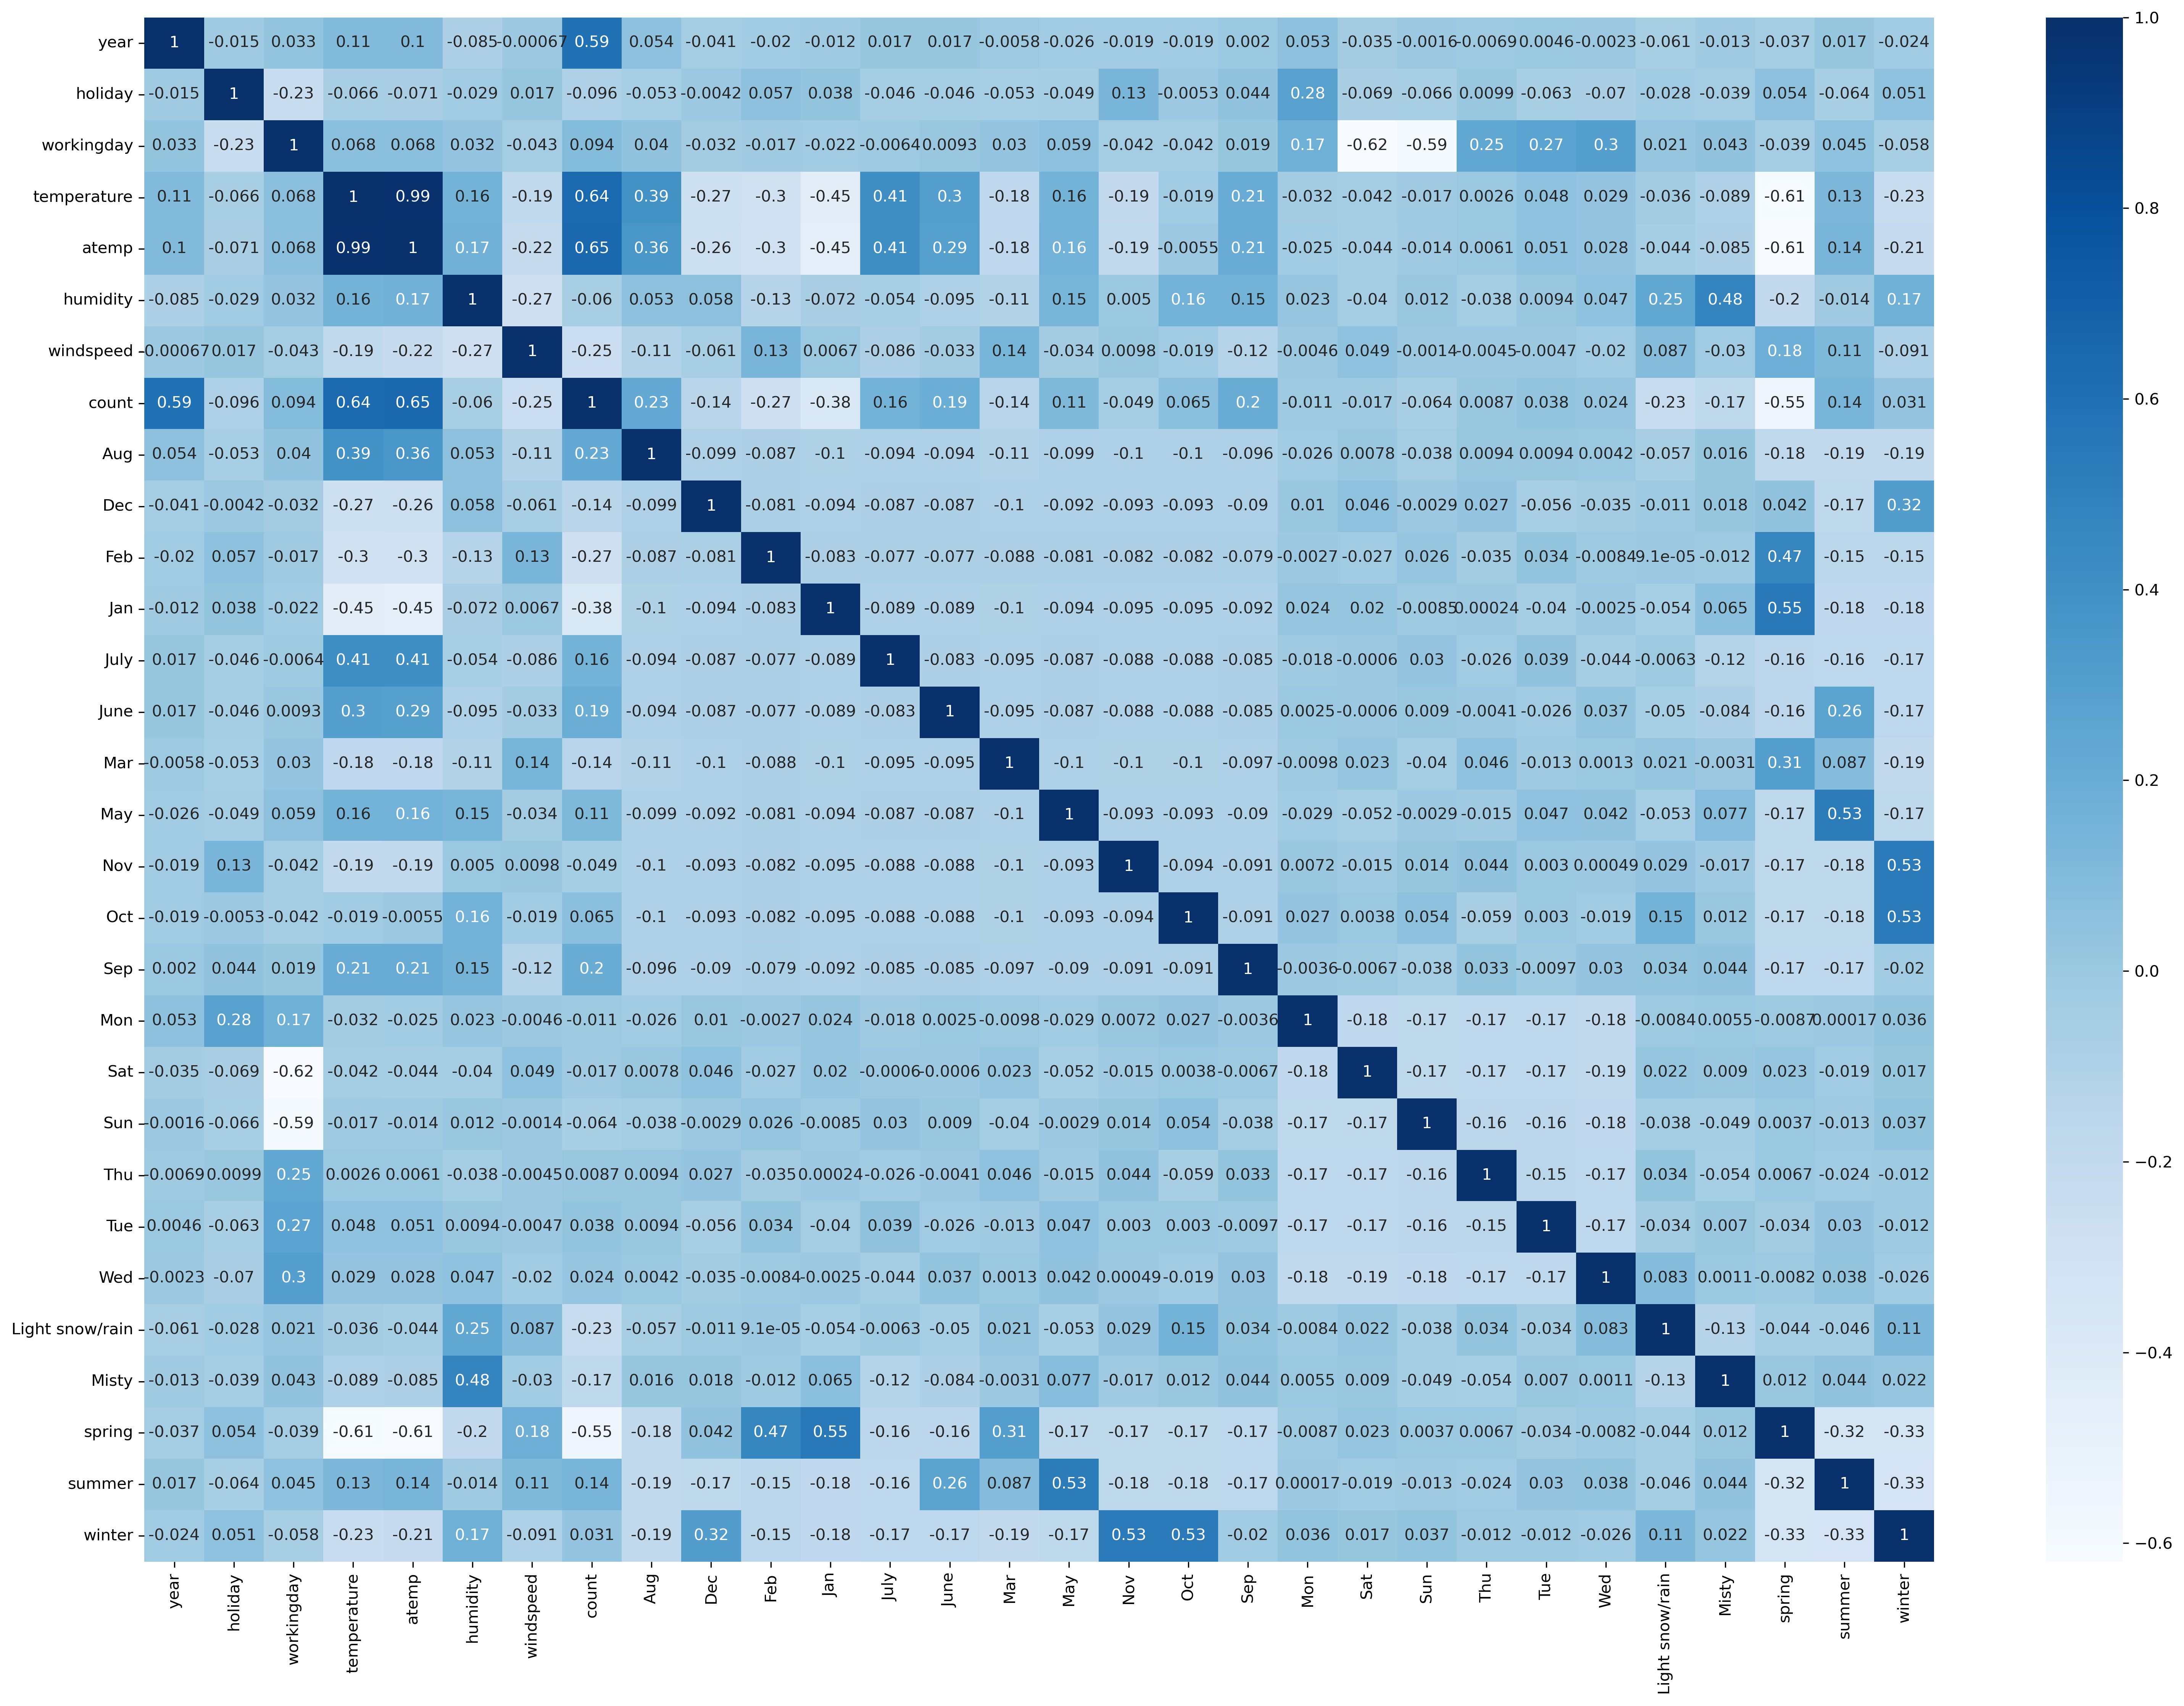

In [164]:
plt.figure(figsize=(21,15),dpi=300)
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')
plt.tight_layout();

<Axes: xlabel='atemp', ylabel='count'>

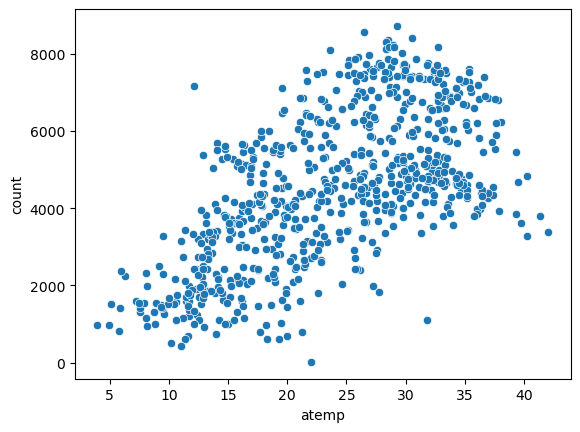

In [165]:
sns.scatterplot(data=new_df, x='atemp', y='count')

In [166]:
new_df

year  holiday  workingday  temperature     atemp  humidity  windspeed  \
0       0        0           0    14.110847  18.18125   80.5833  10.749882   
1       0        0           0    14.902598  17.68695   69.6087  16.652113   
2       0        0           1     8.050924   9.47025   43.7273  16.636703   
3       0        0           1     8.200000  10.60610   59.0435  10.739832   
4       0        0           1     9.305237  11.46350   43.6957  12.522300   
..    ...      ...         ...          ...       ...       ...        ...   
725     1        0           1    10.420847  11.33210   65.2917  23.458911   
726     1        0           1    10.386653  12.75230   59.0000  10.416557   
727     1        0           0    10.386653  12.12000   75.2917   8.333661   
728     1        0           0    10.489153  11.58500   48.3333  23.500518   
729     1        0           1     8.849153  11.17435   57.7500  10.374682   

     count  Aug  Dec  ...  Sat  Sun  Thu  Tue  Wed  Light snow/rain  Misty  \
0      985    0    0  ...    1    0    0    0    0                0      1   
1      801    0    0  ...    0    1    0    0    0                0      1   
2     1349    0    0  ...    0    0    0    0    0                0      0   
3     1562    0    0  ...    0    0    0    1    0                0      0   
4     1600    0    0  ...    0    0    0    0    1                0      0   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...              ...    ...   
725   2114    0    1  ...    0    0    1    0    0                0      1   
726   3095    0    1  ...    0    0    0    0    0                0      1   
727   1341    0    1  ...    1    0    0    0    0                0      1   
728   1796    0    1  ...    0    1    0    0    0                0      0   
729   2729    0    1  ...    0    0    0    0    0                0      1   

     spring  summer  winter  
0         1       0       0  
1         1       0       0  
2         1       0       0  
3         1       0       0  
4         1       0       0  
..      ...     ...     ...  
725       1       0       0  
726       1       0       0  
727       1       0       0  
728       1       0       0  
729       1       0       0  

[730 rows x 30 columns]

#### Building the model

In [167]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temperature      730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   count            730 non-null    int64  
 8   Aug              730 non-null    uint8  
 9   Dec              730 non-null    uint8  
 10  Feb              730 non-null    uint8  
 11  Jan              730 non-null    uint8  
 12  July             730 non-null    uint8  
 13  June             730 non-null    uint8  
 14  Mar              730 non-null    uint8  
 15  May              730 non-null    uint8  
 16  Nov              730 non-null    uint8  
 17  Oct             

In [168]:
y_train = df_train.pop('count')
X_train = df_train

In [169]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [170]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 16),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 10),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Light snow/rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [171]:
column = X_train.columns[rfe.support_]
print(list(column))

['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed', 'July', 'Sep', 'Sat', 'Light snow/rain', 'Misty', 'spring', 'summer', 'winter']


In [172]:
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [173]:
# Create a dataframe with best selected features
X_train_rfe = X_train[column]

In [174]:
# Calculate VIF 
cal_VIF(X_train_rfe)

Features    VIF
4          humidity  28.48
3       temperature  17.00
2        workingday   5.30
5         windspeed   4.72
11           spring   4.24
13           winter   3.44
12           summer   2.85
10            Misty   2.28
0              year   2.09
8               Sat   1.97
6              July   1.58
7               Sep   1.39
9   Light snow/rain   1.24
1           holiday   1.17

In [175]:
# First Model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.31e-192
Time:                        21:30:07   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2397      0.036     

In [176]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
cal_VIF(X_train_new)


Features   VIF
3       temperature  6.98
2        workingday  5.22
4         windspeed  4.66
10           spring  2.49
11           summer  2.34
0              year  2.07
12           winter  1.99
7               Sat  1.96
5              July  1.58
9             Misty  1.57
6               Sep  1.35
1           holiday  1.17
8   Light snow/rain  1.08

In [177]:
## Building 2nd Linear Regression Model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.84e-189
Time:                        21:30:07   Log-Likelihood:                 508.55
No. Observations:                 511   AIC:                            -989.1
Df Residuals:                     497   BIC:                            -929.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1566      0.031     

In [178]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
cal_VIF(X_train_new)

Features   VIF
3       temperature  5.71
2        workingday  5.22
4         windspeed  4.66
9            spring  2.40
0              year  2.07
10           summer  2.01
6               Sat  1.96
11           winter  1.83
8             Misty  1.56
5               Sep  1.24
1           holiday  1.17
7   Light snow/rain  1.08

In [180]:
# 3rd LR model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.21e-188
Time:                        21:30:16   Log-Likelihood:                 504.81
No. Observations:                 511   AIC:                            -983.6
Df Residuals:                     498   BIC:                            -928.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1474      0.031     

In [181]:
lr_3.params

const              0.147388
year               0.234750
holiday           -0.054806
workingday         0.047897
temperature        0.479522
windspeed         -0.149031
Sep                0.089207
Sat                0.058604
Light snow/rain   -0.291150
Misty             -0.081320
spring            -0.053899
summer             0.062666
winter             0.098218
dtype: float64

#### Residual analysis

In [ ]:
y_train_pred = lr_3.predict(X_train_lm_3)

In [ ]:
plt.figure(figsize=(10,5),dpi=250)
sns.displot((y_train - y_train_pred), bins = 30 ,color='r')
plt.title('Error Terms\n', fontsize = 25) 
plt.xlabel('\nError', fontsize = 18)
plt.ylabel('Density\n', fontsize = 18)
plt.tight_layout();

In [ ]:
cal_VIF(X_train_new)

#### Testing the model

In [ ]:
num_vars = ['temperature','atemp','humidity','windspeed','count']

#Test data to be transformed only, no fitting
df_test[num_vars] = scale.transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('count')
X_test = df_test

In [ ]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)

In [ ]:
y_pred = lr_3.predict(X_test_lm_3)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R² Value = {round(r2,4)}')

#### Model evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(12,5),dpi=250)
plt.scatter(y_test, y_pred)
plt.title('y_test   V/S   y_pred\n', fontsize = 18)
plt.xlabel('\ny_test', fontsize = 18)
plt.ylabel('y_pred\n', fontsize = 16)
plt.show()

In [182]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(f'Adjusted R² = {adjusted_r2}')

Adjusted R² = 0.7951


#### Conclusion

The R-squared value for the testing dataset is 0.7951, suggesting that around .38% of the variability in the bike demand is captured by the model on unseen data.
The adjusted R-squared value for the training dataset is 0.829, which takes into account the number of predictors in the model, providing a more reliable measure of the model's goodness of fit.
The adjusted R-squared value for the testing dataset is 0.7944, reflecting the adjusted goodness of fit on unseen data.
The demand of bikes is influenced by various factors such as year, holiday, temperature, windspeed, September month, presence of light snow/rain, misty conditions, and the seasons of spring, summer, and winter.

These metrics and the specified independent variables provide insights into the performance of the regression model in predicting bike demand and highlight the key factors affecting it.